##Import all the packages


In [ ]:
import os
from google.colab import drive
from pathlib import Path
from datetime import datetime

drive.mount('/content/gdrive')
home_path = Path("/content/gdrive/MyDrive/CPP_data")
os.chdir(home_path)

print(home_path)
print(os.getcwd())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/CPP_data
/content/gdrive/MyDrive/CPP_data


In [ ]:
import numpy as np
import pandas as pd
import pyarrow 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
import re

#import boto3
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from pathlib import Path
import plotly.express as px
# from learn.dataset import TabularDataset
# from learn.model import CiteAutoencoder
# from learn.train import train_model, get_encodings

!pip install umap-learn
!pip install umap-learn[parametric_umap]
!pip install umap-learn[plot]
import umap

import copy
import random


##UNIVERSAL FUNCTIONS

###Markers

In [ ]:
#MARKERS
markers_all = dict()
markers_all = {'immune' : ["PTPRC"],
'stroma' : ["FAP","HTRA1","FBN1"],
'epithel' : ["KRT2","KRT7","KRT8","VIL1","KRT19","KRT20","CLDN7","EPCAM","MUC1","KRT18","CLDN4"],
'melanocyte': ["MIA","SLC45A2","PMEL","MLANA"],
'keratinocyte': ["KRT1","KRT2","KRT5","KRT10","KRT14","KRT15"],
'tcell': ["CD3E","CD3D","CD3G"],
'bcell': ["FCRL1","FCRLA","PAX5","MS4A1","CD19","CD79B","CLEC17A","CD22","CD79A"],
'myeloid': ["CCR1","CD68","CD14","CSF1R","CD163","IGSF6","C5AR1","LILRA5"],
'neutrophil': ["CXCR2","TMEM252","ALPL","KRT23","FCGR3B","FCGR3A","MGAM","CXCR1","HIST2H2AA4"],
'm2': ["MSR1","CD38","HLA-DRA","HLA-DRB1","HLA-DRB5","MRC1","C1QA"],
'natural_killer': ["NCAM1","NCR1","KLRB1","FCGR3A","FGFBP2","GZMB"],
'plasma': ["DERL3","SDC1","PRDX4","SSR4","JCHAIN","FKBP11"],
'cd4': ["CD4"],
'cd8': ["CD8A","CD8B"],
'treg': ["IL2RA","FOXP3","CCR8"],
'naive': ["TCF7","IL7R","CCR7","SELL","LEF1","LTB"],
'early': ["GZMK","SH2D1A","EOMES","DTHD1","SLAMF7","FCRL3","CD28","CXCR5"],
'exhausted': ["HAVCR2","ENTPD1","GZMB","LAYN","CD38","VCAM1","TOX","LAG3"],
'cycling': ["MKI67","TOP2A"],
'tismem': ["ITGAE","ZNF683","ITGA1"],
'eff': ["FCGR3A","FGFBP2","CX3CR1","SORL1","S1PR1","KLF2","KLRG1","LILRB1"],
'caf': ["S100A4","CD248","PDPN","THY1","COL1A1","COL1A2","COL6A1","COL6A2","COL6A3","DCN"],
'pericyte': ["CSPG4","RGS5","ACTA2","DES","PDGFRB"],
'endothel': ["PECAM1","FLT4","STAB1","FLT1","ICAM1","ICAM2","SELE","SELP","VWF","CD34","CDH5"]}


In [ ]:
markers_four = dict()
markers_four = {'Naive': ["TCF7","IL7R","CCR7","SELL","LEF1","LTB"],
'EarlyMemory': ["GZMK","SH2D1A","EOMES","DTHD1","SLAMF7","FCRL3","CD28","CXCR5"],
'Exhausted': ["HAVCR2","ENTPD1","GZMB","LAYN","CD38","VCAM1","TOX","LAG3"],
'TissueResidentMemory': ["ITGAE","ZNF683","ITGA1"],
'AbundantGenes':["GAPDH","RPL19","ACTB","PTPRC","CD3D","CD3E","CD3G","CD8A","CD8B"],
'CheckPoints':["CTLA4","PDCD1","TIGIT","PVRIG","CD96","CD226"]
}

In [ ]:
markers_last = dict()
markers_last = {
    'Naive': ["TCF7","IL7R","CCR7","SELL","LEF1","LTB"],
    'EarlyMemory': ["GZMK","SH2D1A","EOMES","DTHD1","SLAMF7","FCRL3","CXCR5"],
    'Exhausted': ["HAVCR2","ENTPD1","LAYN","CD38","VCAM1","TOX","LAG3"],
    'TissueResidentMemory': ["ITGAE","ZNF683","ITGA1"],
    'TEM':["FCGR3A","FGFBP2","CX3CR1","LILRB1","SORL1"],
    'Cycling':["TOP2A","MKI67"],
    'CirculatingMemory':["NR4A1","NR4A2","NR4A3","KLF2"],
    'AbundantGenes':["GAPDH","RPL19","ACTB","PTPRC","CD3D","CD3E","CD3G","CD8A","CD8B"],
    'CheckPoints':["CTLA4","PDCD1","TIGIT","PVRIG","CD96","CD226"]
    }

'''
EarlyMemory <- c("CXCR5","GZMK","SH2D1A","EOMES","DTHD1","SLAMF7","FCRL3")  "CD28"
Exhausted <- c("HAVCR2","ENTPD1","LAYN","CD38","LAG3","VCAM1","TOX")   "GZMB"

TEM <- c("FCGR3A","FGFBP2","CX3CR1","LILRB1","SORL1")
CirculatingMemory <- c("NR4A1","NR4A2","NR4A3","KLF2")

# last addition from Yossef (dark gray)
AbundantGenes <- c("GAPDH","RPL19","ACTB","PTPRC","CD3D","CD3E","CD3G","CD8A","CD8B")

Last confirmation from Yossef:
EarlyMemory <- c("CXCR5","GZMK","SH2D1A","EOMES","DTHD1","SLAMF7","FCRL3")

Exhausted <- c("HAVCR2","ENTPD1","LAYN","CD38","LAG3","VCAM1","TOX")

Naive <- c("TCF7","CCR7","IL7R","LEF1","SELL","LTB")

TissueResidentMemory <- c("ITGAE","ITGA1","ZNF683")

TEM <- c("FCGR3A","FGFBP2","CX3CR1","LILRB1","SORL1")

Cycling <- c("TOP2A","MKI67")

CirculatingMemory <- c("NR4A1","NR4A2","NR4A3","KLF2")
The abundant genes are just to make sure there is no bias related to gene expression.

AbundantGenes <- c("GAPDH","RPL19","ACTB","PTPRC","CD3D","CD3E","CD3G","CD8A","CD8B")


The Check Point genes are what we currently studying. They are not a set of cell state specific markers
''' 

'\nEarlyMemory <- c("CXCR5","GZMK","SH2D1A","EOMES","DTHD1","SLAMF7","FCRL3")  "CD28"\nExhausted <- c("HAVCR2","ENTPD1","LAYN","CD38","LAG3","VCAM1","TOX")   "GZMB"\n\nTEM <- c("FCGR3A","FGFBP2","CX3CR1","LILRB1","SORL1")\nCirculatingMemory <- c("NR4A1","NR4A2","NR4A3","KLF2")\n\n# last addition from Yossef (dark gray)\nAbundantGenes <- c("GAPDH","RPL19","ACTB","PTPRC","CD3D","CD3E","CD3G","CD8A","CD8B")\n\nLast confirmation from Yossef:\nEarlyMemory <- c("CXCR5","GZMK","SH2D1A","EOMES","DTHD1","SLAMF7","FCRL3")\n\nExhausted <- c("HAVCR2","ENTPD1","LAYN","CD38","LAG3","VCAM1","TOX")\n\nNaive <- c("TCF7","CCR7","IL7R","LEF1","SELL","LTB")\n\nTissueResidentMemory <- c("ITGAE","ITGA1","ZNF683")\n\nTEM <- c("FCGR3A","FGFBP2","CX3CR1","LILRB1","SORL1")\n\nCycling <- c("TOP2A","MKI67")\n\nCirculatingMemory <- c("NR4A1","NR4A2","NR4A3","KLF2")\nThe abundant genes are just to make sure there is no bias related to gene expression.\n\nAbundantGenes <- c("GAPDH","RPL19","ACTB","PTPRC","CD3D","CD3

###Upload dataset, filter by cells needed, add markers

In [ ]:
def check_markers(dataset, markers):
    count=0
    dataset['marker'] = 'none'
    print('************************************************')
    for key in markers.keys():
      count_key=0
      #print('Checking markers from set', key)
      for each in markers[key]:
        if len(dataset.loc[(dataset['gene'] == each)]) >0:
          dataset.loc[(dataset['gene'] == each), 'marker'] = key
          #print('Found', each)
          count+=1
          count_key+=1
        else:
          print('Not found', each)
      print(f'Total markers for key {key} is: {count_key}')
    print('Total number of markers found', count)
    markers_count = dataset['marker'].value_counts()
    print('The main markers count ', markers_count[main_markers].sum())
    print('The Checkpoints count ', markers_count[check_points].sum())
    print('The markers for check purposes count ', markers_count[markers_check].sum())
    print('************************************************')

    return dataset

def filtering_some_genes(dataset):
#filtering Mitochondrial and the Mirna genes according to Amit instruction
#genes <- colnames(tGSEdata)[-grep(x=colnames(tGSEdata),pattern="^R[NUP]|^MT-|^MIR",perl=T)]

#"^R[NUP]|^MT-|^MIR”
#RN
#RU
#RP
#MT- only 1 and not in the beginning 
#MIR - 1258
#343 R[NUP]
  print('************************************************')
  r = re.compile("R[NUP]")
  #excluding R[NUP]
  print('The total number of genes filtered out by R[NUP] : ', len(dataset[dataset.gene.str.match(r)]))
  if len(dataset[dataset.gene.str.match(r)]) > 0:
    dataset = dataset[~dataset.gene.str.match(r)]
  r = re.compile("MIR")
  print('The total number of genes filtered out by MIR : ', len(dataset[dataset.gene.str.match(r)]))
  if len(dataset[dataset.gene.str.match(r)]) > 0:
    dataset = dataset[~dataset.gene.str.match(r)]
  r = re.compile("MT")
  print('The total number of genes filtered out by MT : ', len(dataset[dataset.gene.str.match(r)]))
  if len(dataset[dataset.gene.str.match(r)]) > 0:
    dataset = dataset[~dataset.gene.str.match(r)]
  print('Final dataset shape: ', dataset.shape)
  print('************************************************')
  return dataset

def create_all_markers_ref_set(dataset, markers):
    all_markers = []
    for key in markers.keys():
      all_markers+= markers[key]
    all_markers_dataset = dataset.copy()
    all_markers_dataset.set_index('gene', inplace=True)
    all_indxs = all_markers_dataset.index
    to_delete = np.setdiff1d(all_indxs, all_markers)
    all_markers_dataset = all_markers_dataset.drop(index=to_delete, axis=0)
    #all_markers_dataset
    print('Total number of markers used', len(all_markers_dataset))
    all_markers_dataset.reset_index(inplace=True)
    #print('all_markers_dataset', all_markers_dataset.columns)
    
    return all_markers_dataset

def add_markers(dataset_f, dataset_or, markers):
  #function adds markers to the dataset
    count=count_tot=0
    print('************************************************')
    for key in markers.keys():
      count_tot+=len(markers[key])
      for each in markers[key]:
        if len(dataset_f.loc[(dataset_f['gene'] == each)]) == 0:
          # if there is no such marker in the final dataset
          print('Found gene that was absent. Adding it...', each)
          #print(dataset_f.columns)
          #print(dataset_or.columns)
          dataset_f=dataset_f.append(dataset_or.loc[(dataset_or['gene'] == each)])      
          count+=1
        else:
          #print('Already exists')
          pass
    print('Total number of markers', count_tot)
    print('Total number of markers added', count)
    print('************************************************')
    dataset_f = dataset_f.sort_index()
    return dataset_f

def prepare_dataset(home_path, path_dataset, path_labels, dataset_name, markers, cell_name_to_filter=None, filter_mit=True):
  #prepares data for the following processing (PCA or NN) 
  #removes cells that we do not need, filter out genes that we do not need, etc.
  #help functions are above
    #name_file = dataset_name + '.parquet.gzip'
    #dataset = pd.read_parquet(os.path.join(home_path, name_file))
    dataset = pd.read_parquet(path_dataset)
    column_names = dataset.columns
    print(column_names[:5])
    if 'symbol' in column_names:
        dataset.columns = ['gene' if x=='symbol' else x for x in dataset.columns]
    print(dataset_name, ' data shape:', dataset.shape)
    if not cell_name_to_filter == None:
      labels = pd.read_csv(path_labels, '\t', header=None)
      print(dataset_name, ' labels shape:', labels.shape)
      print(labels[1].value_counts())
      labels = labels.loc[labels[1] == cell_name_to_filter]
      labels.drop(1, axis=1, inplace=True)
      labels_list = labels.to_numpy().reshape(1, -1)

      #all the columns of the whole dataset
      columns = dataset.columns[1:-1]
      #we have to find the columns that are NOT in CD8 set
      col_to_drop = [x for x in columns if x not in labels_list]
      #now we remove these columns from the dataset
      dataset = dataset.drop(col_to_drop, axis=1)
      print('Dataset filtered by cells needed (',cell_name_to_filter, '), final shape:', dataset.shape)

    if filter_mit:
      print('************************************************')
      print('Filtering Mitochondrial and Mirna genes..')
      dataset_filtered = filtering_some_genes(dataset)

    if markers != None:
        print('************************************************')
        all_markers_dataset = create_all_markers_ref_set(dataset, markers)
        print('Adding markers...')
        dataset_filtered = add_markers(dataset_filtered, all_markers_dataset, markers)
        dataset_filtered = check_markers(dataset_filtered, markers)
        
    #dataset_filtered.to_parquet('/content/gdrive/MyDrive/CPP_data/data_NSCLC_filtered.gzip', compression='gzip')
    #name_file = dataset_name + '_filtered_markers.gzip'
    #dataset_filtered.to_parquet(os.path.join(home_path, name_file), compression='gzip')

    return dataset_filtered

###Preparing data for PCA and running PCA

In [ ]:
def variance_set(X, x_labels):
  genes_var = pd.DataFrame(data=X.var(axis=1), columns=['Var'])
  print('variance tables shape', genes_var.shape)
  print('x_labels', x_labels.shape)
  print('x_labels index', x_labels.index)
  print('genes_var index', genes_var.index)
  print('difference in indexes', np.setdiff1d(x_labels.index, genes_var.index))
  print(X.shape)
  genes_var['Mean'] = X.mean(axis=1,skipna=True, numeric_only=True)
  genes_var['Std'] = X.std(axis=1,skipna=True, numeric_only=True)
  print('variance tables shape', genes_var.shape)
  genes_var = genes_var.join(x_labels)
  print('variance table', genes_var.head())
  print('variance tables shape', genes_var.shape)
  print('************************************************')
  return genes_var
'''
cnt=0
  for key in markers.keys():
    for each in markers[key]:
      if len(training_set.loc[(training_set['gene'] == each)]) > 0:
        cnt+=1
  print('Total number of markers equals: ', cnt)

'''

def check_var_thresh(dataset,th_mean, th_std_ratio):
  print('Mean mean value by genes', dataset.Mean.mean(axis=0))
  print('Mean std value by genes', dataset.Std.mean(axis=0))
  check=dataset[(dataset.Mean>th_mean)&((dataset.Std/dataset.Mean)>th_std_ratio)]
  print(check.shape)



def prep_data_PCA(home_path, path_dataset, dataset_name, markers, th_mean, th_std_ratio):
  #takes the filtered dataset and returns training set for PCA task
  name_file = dataset_name + 'filtered_markers.gzip'
  dataset_filtered = pd.read_parquet(os.path.join(home_path, name_file)).reset_index(drop=True)
  print('Dataset shape: ', dataset_filtered.shape)
  x_labels = dataset_filtered['gene']
  x_markers = dataset_filtered['marker']
  print('x_labels shape', x_labels.shape, 'x_markers shape', x_markers.shape)
  X = dataset_filtered.iloc[:, 1:-1]
  if dataset_filtered['marker'].isna().sum() > 0:
    dataset_filtered['marker'].fillna('none', inplace=True)
  print('Markers values: \n', dataset_filtered['marker'].value_counts())
  X = np.log2(X+1)
  X['gene'] = x_labels
  X['marker'] = x_markers
  print('X for PCA shape: ', X.shape)
  #calculating variance for every gene
  genes_var = variance_set(X, x_labels)
  #filtering genes according to the threshold
  training_set = X[(genes_var.Mean>th_mean)&((genes_var.Std/genes_var.Mean)>th_std_ratio)]
  print('Training set shape', training_set.shape)
  print('Adding markers (check if they were deleted)')
  training_set = add_markers(training_set, X, markers)
  #print('Final check')
  check_markers(training_set, markers)
  print('The final dataset shape for PCA: ', training_set.shape)
  print('************************************************')
  training_set = training_set.sort_index()
  return training_set, genes_var 


def running_PCA(dataset, home_path, num_comp=10):
  #we input training_set to run PCA on it (by default using 10 components)
  var_pc=np.zeros(num_comp)
  gene_labels_fin = dataset['gene'].reset_index(drop=True)
  gene_markers_fin = dataset['marker'].reset_index(drop=True).copy()
  print('markers check: \n', gene_markers_fin.value_counts())
  tr_x_indxs=dataset.index
  X_train = dataset.iloc[:, 1:-2]
  print('X_train shape: ', X_train.shape)
  print('************************************************')
  print("Principal Component Analysis (PCA)")
  pca = PCA(n_components = num_comp)
  X_pca = pca.fit_transform(X_train)
  col_names = list(' ') * num_comp
  for i in range(num_comp):
    col_names[i] = 'PC' + str(i+1)

  #pca_df = pd.DataFrame(data=X_pca, columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
  pca_df = pd.DataFrame(data=X_pca, columns=col_names)
  pca_df = pd.concat([pca_df, gene_labels_fin], axis=1)
  pca_df = pd.concat([pca_df, gene_markers_fin], axis=1)
  print('explained var by components', np.round(pca.explained_variance_ratio_,5))
  for i in range(var_pc.shape[0]):
    var_pc[i] = np.round(pca.explained_variance_ratio_*100,5)[i]
  #palette = sns.color_palette("muted", n_colors=len(list(labels['cell_type'].unique())))
  #pca_df.to_csv('pca_df_10.csv')

  #adding date and time to the saved file
  name_file= dataset_name +'_' + str(len(markers)) +'_PCA_'+ str(num_comp) + '_' + datetime.now().strftime("%d-%m_%H:%M") + '.csv'
  print('Saving results of PCA to csv file...')
  pca_df.to_csv(os.path.join(home_path, name_file))
  return pca_df, var_pc

def plotting_res_sns(df, var_pc, comp1, comp2, color_marker, title):
    #takes pca_df and variable with components and the names of the components we are interested in
    #comp1 and comp2 are STRINGS in the following format: 'PC1', 'PC2', etc
    sns.set_style("white")
    indx1 = int(comp1[-1]) - 1 
    indx2 = int(comp2[-1]) - 1
    #color_marker = {'none':'lightgray', 'Naive': 'blue', 'Exhausted': 'lightgreen', 'TissueResidentMemory': 'cyan', 
     #                   'EarlyMemory': 'red','TEM': 'purple','CirculatingMemory': 'darkgreen',
      #                  'Cycling': 'yellow', 'CheckPoints': 'black', 'AbundantGenes': 'darkgray'}
    f, ax = plt.subplots(figsize=(16, 8))
    p1 = sns.scatterplot(x=comp1,y=comp2,data=df, linewidth=0.2, s=30, alpha=1, hue='marker', legend='full',
                     #palette=['lightgray','black', 'darkgreen', 'purple', 'red', 'blue','lightgreen', 'cyan','darkgray', 'yellow'])
                     palette=color_marker)
    p1.set_title(title)
    plt.xlabel(comp1 + ' - ' + str(var_pc[indx1])[:4] + '%')
    plt.ylabel(comp2 + ' - ' + str(var_pc[indx2])[:4] + '%')

    #for line in range(0,df.shape[0]):
     # if pca_df.PC1[line] > 200:
      #  p1.text(pca_df.PC1[line]+0.01, pca_df.PC2[line], 
       # pca_df.gene[line], horizontalalignment='left', 
        #size='small', color='black', weight='regular')
    #plt.legend()
    plt.show()

def plotting_res_plotly(df, var_pc, comp1, comp2, color_marker, title):
    indx1 = int(comp1[-1]) - 1 
    indx2 = int(comp2[-1]) - 1
#color_dict = {0:'blue',1:'red'}
#[color_dict[x] for x in Y]
#parameter c - defines color for each point
#c = [color_dict[x] for x in df.class]

    #color_marker = {'none':'lightgray', 'Naive': 'blue', 'Exhausted': 'lightgreen', 'TissueResidentMemory': 'cyan', 
     #                   'EarlyMemory': 'red','TEM': 'purple','CirculatingMemory': 'darkgreen',
      #                  'Cycling': 'yellow', 'CheckPoints': 'black', 'AbundantGenes': 'darkgray'}

    fig = px.scatter(df, x=comp1, y=comp2, color="marker", hover_name='gene', #text='gene',
                    labels={
                        comp1: comp1 + ' - ' + str(var_pc[indx1])[:4] + '%',
                        comp2: comp2 + ' - ' + str(var_pc[indx2])[:4] + '%'},
                    
                    color_discrete_sequence=['lightgray','black', 'darkgreen', 'purple', 'red', 'blue','lightgreen', 'cyan','darkgray', 'yellow'],
                    color_discrete_map= color_marker,
                    title= title)

    fig.show()


def plotting_UMAP_sns(df, comp1, comp2, color_marker, title):
    #takes pca_df and variable with components and the names of the components we are interested in
    #comp1 and comp2 are STRINGS in the following format: 'PC1', 'PC2', etc
    sns.set_style("white")
    indx1 = int(comp1[-1]) - 1 
    indx2 = int(comp2[-1]) - 1
    #color_marker = {'none':'lightgray', 'Naive': 'blue', 'Exhausted': 'lightgreen', 'TissueResidentMemory': 'cyan', 
     #                   'EarlyMemory': 'red','TEM': 'purple','CirculatingMemory': 'darkgreen',
      #                  'Cycling': 'yellow', 'CheckPoints': 'black', 'AbundantGenes': 'darkgray'}
    f, ax = plt.subplots(figsize=(16, 8))
    p1 = sns.scatterplot(x=comp1,y=comp2,data=df, linewidth=0.2, 
                         #s=30, 
                         alpha=1, hue='marker', legend='full',
                     #palette=['lightgray','black', 'darkgreen', 'purple', 'red', 'blue','lightgreen', 'cyan','darkgray', 'yellow'])
                     palette=color_marker,
                     #size = np.where(df.marker == 'none',1,6)
                     )
    p1.set_title(title)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.show()

'''
  fig = px.scatter(plot_emb_res, x="UMAP1", y="UMAP2", color="marker",
                  color_discrete_map = color_marker,
                  hover_name='gene',
                  title = title)                
  fig.show()

'''


def plotting_UMAP_plotly(df, comp1, comp2, color_marker, title):
    fig = px.scatter(df, x=comp1, y=comp2, color="marker", hover_name='gene', #text='gene',
                    color_discrete_map= color_marker,
                    #size=np.where(df.marker == 'none',1,6),
                    title= title)
    fig.show()

'''
Naive, Exhausted, TissueResidentMemory, EarlyMemory,TEM,CirculatingMemory,Cycling,CheckPoints, Abundant

Blue, light green,cyan, red, purple,dark green,yellow,black, dark gray
'''




'\nNaive, Exhausted, TissueResidentMemory, EarlyMemory,TEM,CirculatingMemory,Cycling,CheckPoints, Abundant\n\nBlue, light green,cyan, red, purple,dark green,yellow,black, dark gray\n'

### UMAP (embedding and plotting the result)

In [ ]:
def umap_embedding(encodings, gene_labels_fin, gene_markers_fin, title):
  embedding = umap.UMAP(random_state=0).fit_transform(encodings)
  print(embedding.shape)
  print(encodings.shape, gene_labels_fin.shape, gene_markers_fin.shape)
  plot_emb_res=pd.concat([gene_labels_fin, gene_markers_fin], axis=1)
  plot_emb_res["UMAP1"] = embedding[:, 0]
  plot_emb_res["UMAP2"] = embedding[:, 1]
  #plot_emb_res.head()
  plotting_UMAP_plotly(plot_emb_res, 'UMAP1', 'UMAP2', color_marker, title)
  plotting_UMAP_sns(plot_emb_res, 'UMAP1', 'UMAP2',color_marker, title)  



###Model

In [ ]:
from torch.utils.data import Dataset

class TabularDataset(Dataset):
    """Custome dataset for tabular data"""
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        return x, x


from collections import defaultdict
from tqdm import tqdm


def train_model(model, train_dl, valid_dl, lr, epochs, verbose=True):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    #optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=lr,
                                                   steps_per_epoch=len(train_dl), epochs=epochs)
    #scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=lr/1000, max_lr=lr, )
    criterion = nn.MSELoss()
    #mae = nn.L1Loss()
    history = defaultdict(list)
    
    mean_losses = []
    for epoch in tqdm(range(1, epochs + 1)):
        model.train()  
        train_loss = 0
        #train_loss2 = 0
        nsamples_train = 0
        for x, y in train_dl:
            optimizer.zero_grad()

            # Forward pass
            x_prime = model(x.to(device))
            loss = criterion(x_prime, y.to(device))

            #loss2 = mae(x_prime.sum().sum(), y.sum().sum())
            # Backward pass
            loss.backward()
            optimizer.step()
            scheduler.step()
            
            # log losses
            batch_size = x.shape[0]
            nsamples_train += batch_size
            train_loss += batch_size*(loss.item())
            
        valid_loss = 0
        nsamples_valid = 0
        
        model = model.eval()
        

        with torch.no_grad():
            for x, y in valid_dl:
                x_prime = model(x.to(device))

                loss = criterion(x_prime, y.to(device))
                
                # log losses
                batch_size = x.shape[0]
                nsamples_valid += batch_size
                valid_loss += batch_size*(loss.item())
                
        train_loss = train_loss / nsamples_train
        valid_loss = valid_loss / nsamples_valid

        history['train'].append(train_loss)
        history['valid'].append(valid_loss)

        
        if verbose and epoch%10==0:
            print(f'Epoch {epoch}: train loss {train_loss}; valid loss {valid_loss}')


    return model, history

def get_encodings(model, dl):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    with torch.no_grad():
        encodings = [model.encoder(x.to(device)) for x, _ in dl]
    return torch.cat(encodings, dim=0)


class LinBnDrop(nn.Sequential):
    """Module grouping `BatchNorm1d`, `Dropout` and `Linear` layers, adapted from fastai."""
    
    def __init__(self, n_in, n_out, bn=True, p=0., act=None, lin_first=True):
        layers = [nn.BatchNorm1d(n_out if lin_first else n_in)] if bn else []
        if p != 0: layers.append(nn.Dropout(p))
        lin = [nn.Linear(n_in, n_out, bias=not bn)]
        if act is not None: lin.append(act)
        layers = lin+layers if lin_first else layers+lin
        super().__init__(*layers)


class Encoder(nn.Module):
    """Encoder for CITE-seq data"""
    
    def __init__(self, nfeatures_rna, nfeatures_pro, hidden_rna, hidden_pro, z_dim):
        super().__init__()
        self.nfeatures_rna = nfeatures_rna
        self.nfeatures_pro = nfeatures_pro

        if nfeatures_rna > 0:
            self.encoder_rna = LinBnDrop(nfeatures_rna, hidden_rna, p=0.1, act=nn.LeakyReLU())

        if nfeatures_pro > 0:
            self.encoder_protein = LinBnDrop(nfeatures_pro, hidden_pro, p=0.1, act=nn.LeakyReLU())

        # make sure hidden_rna and hidden_pro are set correctly
        hidden_rna = 0 if nfeatures_rna == 0 else hidden_rna
        hidden_pro = 0 if nfeatures_pro == 0 else hidden_pro
        
        self.encoder = LinBnDrop(hidden_rna + hidden_pro, z_dim, act=nn.LeakyReLU())

    def forward(self, x):
        if self.nfeatures_rna > 0 and self.nfeatures_pro > 0:
            x_rna = self.encoder_rna(x[:, :self.nfeatures_rna])
            x_pro = self.encoder_protein(x[:, self.nfeatures_rna:])
            x = torch.cat([x_rna, x_pro], 1)

        elif self.nfeatures_rna > 0 and self.nfeatures_pro == 0:
            x = self.encoder_rna(x)

        elif self.nfeatures_rna == 0 and self.nfeatures_pro > 0:
            x = self.encoder_protein(x)
            
        return self.encoder(x)


class Decoder(nn.Module):
    """Decoder for CITE-seq data"""
    def __init__(self, nfeatures_rna, nfeatures_pro, hidden_rna, hidden_pro, z_dim):
        super().__init__()
        self.nfeatures_rna = nfeatures_rna
        self.nfeatures_pro = nfeatures_pro

        # make sure hidden_rna and hidden_pro are set correctly
        hidden_rna = 0 if nfeatures_rna == 0 else hidden_rna
        hidden_pro = 0 if nfeatures_pro == 0 else hidden_pro

        hidden = hidden_rna + hidden_pro

        self.decoder = nn.Sequential(
            LinBnDrop(z_dim, hidden, act=nn.LeakyReLU()),
            LinBnDrop(hidden, nfeatures_rna + nfeatures_pro, bn=False)
            )

    def forward(self, x):
        x = self.decoder(x)
        return x

        
class CiteAutoencoder(nn.Module):
    def __init__(self, nfeatures_rna=0, nfeatures_pro=0, hidden_rna=120, hidden_pro=8, z_dim=20):
        """ Autoencoder for citeseq data """
        super().__init__()
 
        self.encoder = Encoder(nfeatures_rna, nfeatures_pro, hidden_rna, hidden_pro, z_dim)
        self.decoder = Decoder(nfeatures_rna, nfeatures_pro, hidden_rna, hidden_pro, z_dim)


    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [ ]:
#Data preparation for the model

def data_prep_train_for_NN(training_set, n_dim, n_epochs=15, batch_size=64, lr=1e-2):
  gene_labels_fin = training_set['gene']
  #.reset_index(drop=True).copy()
  gene_markers_fin = training_set['marker']
  X_nn = training_set
  #.reset_index(drop=True)
  X_nn = X_nn.iloc[:, :-2]
  print(f'Shape of the dataset for the modelling: {X_nn.shape}')
  print(X_nn)
  train, valid = train_test_split(X_nn.to_numpy(dtype=np.float32), test_size=0.1)
                                  #, random_state=0)
  print(f'Shape of the train set: {train.shape}, shape of the validation set {valid.shape}')
  nfeatures  = X_nn.shape[1]
  #print(f'Number of features for the train: {nfeatures}')
  train_ds = TabularDataset(train)
  valid_ds = TabularDataset(valid)
  train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
  valid_dl = DataLoader(valid_ds, batch_size=batch_size, shuffle=False)
  #x, y = next(iter(train_dl))
  #x.shape, y.shape
  model = CiteAutoencoder(nfeatures_rna=nfeatures, nfeatures_pro=0, hidden_rna=400, hidden_pro=0, z_dim=n_dim)
  print(model)
  #lr = 1e-2
  epochs = n_epochs
  model, losses = train_model(model, train_dl, valid_dl, lr=lr, epochs=epochs)
  fig =  plt.plot(figsize=(15,5))
  plt.plot(losses['train'], label = 'Train loss')
  plt.plot(losses['valid'], label='Validation loss')
  plt.legend()
  plt.show()
  return model, X_nn, gene_labels_fin, gene_markers_fin

def test_NN_print_result(model, X_nn, gene_labels_fin, gene_markers_fin, n_dim, batch_size=64):
  test_ds = TabularDataset(X_nn.to_numpy(dtype=np.float32))
  test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

  encodings = get_encodings(model, test_dl)
  encodings = encodings.cpu().numpy()
  print(f'Encoding shape: {encodings.shape}')
  columns = list(range(1, n_dim+1))
  encodings_df = pd.DataFrame(data=encodings, columns=columns)
  res = pd.concat([encodings_df, gene_labels_fin, gene_markers_fin], axis=1)
  print(f'Saving csv file with the results of NN modeling, dimensions {n_dim}, markers {len(markers)}')
  name_file= dataset_name +'_' + str(len(markers)) +'_NN_'+ str(n_dim) + '_' + datetime.now().strftime("%d-%m_%H:%M") + '.csv'
  res.to_csv(os.path.join(home_path, name_file))

  return encodings

#def printing_UMAP_NNres(encodings, gene_labels_fin, gene_markers_fin):
 # return


#Running code on different datasets


### Universal pipeline (working on the filtered datasets already)



####Two sets of markers in a row

In [ ]:
def pipeline_run():
    print(f'Dataset {dataset_name}. \nRunning data preparation for {marker} markers')

    #BASIC PIPELINE: PREPROCESSING (filtering by some genes), PREPARING FOR PCA
    #first - filter by cell types we need (TTC/CD8)
    dataset_filtered = prepare_dataset(home_path, path_dataset, path_labels, datasets[index_dataset], markers) 
    #dataset_filtered.head
    print(f'Thresholds used: {thresholds[dataset_name][0], thresholds[dataset_name][1]}')
    #get training set
    training_set, var_df = prep_data_PCA(home_path, path_dataset, dataset_name, markers, thresholds[dataset_name][0], thresholds[dataset_name][1])

    n = input('Check the thresholds? Y/N')
    if n.lower() == 'y':
      #check_var_thresh(var_df,0.849, 1.9)
        pass
    else:
        print(f'Running PCA for {dims} dimensions')
        pca_df, var_pc = running_PCA(training_set, home_path, dims[-1])
        for dim_size in dims:
          pca_to_print=pca_df[pca_df.columns[:dim_size]].copy()
          pca_to_print = pd.concat([pca_to_print, pca_df[pca_df.columns[-2:]]], axis=1)
          title = str(len(markers)) + ' markers, PCA - ' + str(dim_size) +'components'
          plotting_res_sns(pca_to_print, var_pc[:dim_size], 'PC2', 'PC3',color_marker, title)
          plotting_res_plotly(pca_df, var_pc, 'PC2', 'PC3',color_marker, title)  

        print('Printing UMAP maps... ')
        for dim_size in dims:
          title = 'UMAP of PCA-' + str(dim_size) + ' results ' + str(len(markers)) + ' markers'
          umap_embedding(pca_df[pca_df.columns[:dim_size]], pca_df['gene'], pca_df['marker'], title)


        print('Running the Neural Network on the same params')
        for dim_size in dims:
          model, X_nn, gene_labels_fin, gene_markers_fin = data_prep_train_for_NN(training_set, dim_size, n_epochs=n_epochs, batch_size=batch_size)
          encodings = test_NN_print_result(model, X_nn, gene_labels_fin, gene_markers_fin, dim_size)
          title = 'UMAP of NN-' + str(dim_size) + ' results ' + str(len(markers)) + ' markers'
          umap_embedding(encodings, gene_labels_fin, gene_markers_fin, title)


If only one set of markers needed correct the first variable num_markers

In [ ]:
num_markers = [4, 7]
print('Datasets: 0 - NSCLC, 1- CRC1, 2- CRC2, 3- HEPA, 4-MELANOMA')
index_dataset = int(input('Input the index of the dataset you are interested in: '))
n = int(input('Input how many different dimensions you want to check for PCA and NN (1, 2, 3, 4, 5?): '))
dims=np.zeros(n, dtype=int)
for i in range(n):
  dims[i]=int(input(f'Input the number of dimensions for the {i+1} run (10-50-100?): '))
print(f'So, the following dimensions will be checked: ', dims)

main_markers = ['EarlyMemory', 'Exhausted','Naive','TissueResidentMemory']
check_points = ['CheckPoints']
markers_check = ['AbundantGenes']

thresholds={'NSCLC':[0.71, 2.1], 'crc1':[0.71, 2.1], 'crc2':[0.8, 1.9], 
            'hepa':[0.849, 1.9], 'mel' :[0.71, 2.1]}
datasets = ['NSCLC', 'crc1', 'crc2', 'hepa', 'mel']
dataset_name = datasets[index_dataset]
home_path = '/content/gdrive/MyDrive/CPP_data/'

path_dataset = '/content/gdrive/MyDrive/CPP_data/data_' + datasets[index_dataset] + '_filtered.gzip'
path_labels = '/content/gdrive/MyDrive/CPP_data/labels_' + datasets[index_dataset]

    #cell_name_to_filter = 'TTC'  #dataset is filtered already
    #NSCLC thresholds 1.2998407729691086/0.7345407510056047 = 1.76
    #CRC2 thresholds 1.346980341580908/0.8146161428779355 = 1.65
    #hepa thresholds 1.3892587059716444 / 0.8494661794810161 = 1.63


for marker in num_markers:
    if marker == 4:
      color_marker = {'none':'lightgray', 'Naive': 'blue', 'Exhausted': 'lightgreen', 'TissueResidentMemory': 'cyan', 
                            'EarlyMemory': 'red', 'CheckPoints': 'black', 'AbundantGenes': 'darkgray'}
      markers = markers_four
    else:                        
      color_marker = {'none':'lightgray', 'Naive': 'blue', 'Exhausted': 'lightgreen', 'TissueResidentMemory': 'cyan', 
                            'EarlyMemory': 'red','TEM': 'purple','CirculatingMemory': 'darkgreen',
                            'Cycling': 'yellow', 'CheckPoints': 'black', 'AbundantGenes': 'darkgray'}
      markers = markers_last
    #RUN THE MAIN SCRIPT
    pipeline_run()


#### To run only 1 dataset / 1 set of markers

The first setup cell - we need to choose the index of the dataset we are interested in AND the number of markers (4 or 7)

In [ ]:
num_markers = int(input('Input number of markers 4 or 7: '))
print('Datasets: 0 - NSCLC, 1- CRC1, 2- CRC2, 3- HEPA, 4-MELANOMA')
index_dataset = int(input('Input the index of the dataset you are interested in: '))
n = int(input('Input how many different dimensions you want to check for PCA and NN (1, 2, 3, 4, 5?): '))
dims=np.zeros(n, dtype=int)
for i in range(n):
  dims[i]=int(input(f'Input the number of dimensions for the {i+1} run (10-50-100?): '))
print(f'So, the following dimensions will be checked: ', dims)

KeyboardInterrupt: ignored

Running data preparation for 4 markers
Index(['symbol', 'TTC100-0616A', 'TTC10-0616A', 'TTC101-0616A',
       'TTC102-0616A'],
      dtype='object')
NSCLC  data shape: (23459, 2184)
************************************************
Filtering Mitochondrial and Mirna genes..
************************************************
The total number of genes filtered out by R[NUP] :  343
The total number of genes filtered out by MIR :  1258
The total number of genes filtered out by MT :  93
Final dataset shape:  (21765, 2184)
************************************************
************************************************
Total number of markers used 40
Adding markers...
************************************************
Found gene that was absent. Adding it... RPL19
Total number of markers 40
Total number of markers added 1
************************************************
************************************************
Total markers for key Naive is: 6
Total markers for key EarlyMemory is: 8
Total 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



variance tables shape (21766, 1)
x_labels (21766,)
x_labels index RangeIndex(start=0, stop=21766, step=1)
genes_var index RangeIndex(start=0, stop=21766, step=1)
difference in indexes []
(21766, 2185)
variance tables shape (21766, 3)
variance table          Var      Mean       Std  gene
0   3.534065  0.839759  1.879911  A1BG
1   0.045334  0.008948  0.212918  NAT2
2  14.288587  2.343138  3.780025   ADA
3   0.003878  0.002864  0.062271  CDH2
4   3.796691  0.731008  1.948510  AKT3
variance tables shape (21766, 4)
************************************************
Training set shape (2296, 2185)
Adding markers (check if they were deleted)
************************************************
Found gene that was absent. Adding it... TCF7
Found gene that was absent. Adding it... IL7R
Found gene that was absent. Adding it... CCR7
Found gene that was absent. Adding it... SELL
Found gene that was absent. Adding it... LTB
Found gene that was absent. Adding it... GZMK
Found gene that was absent. Adding 

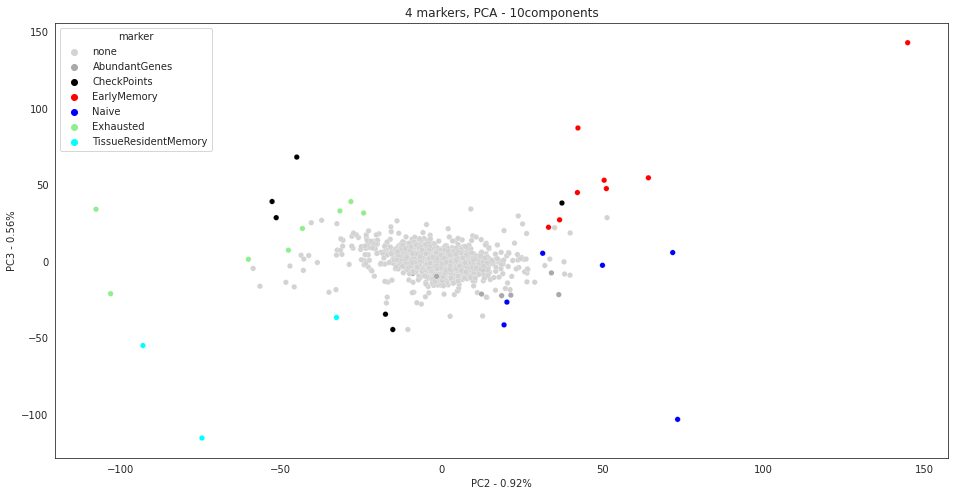

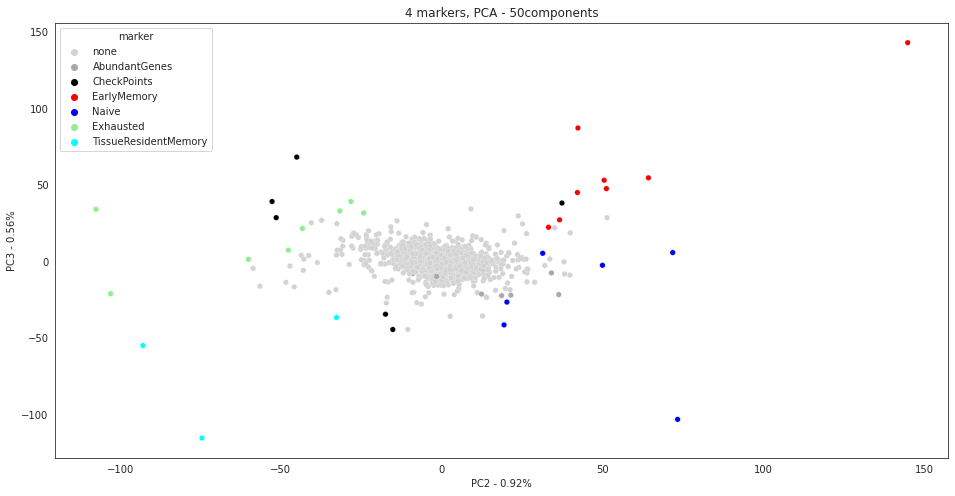

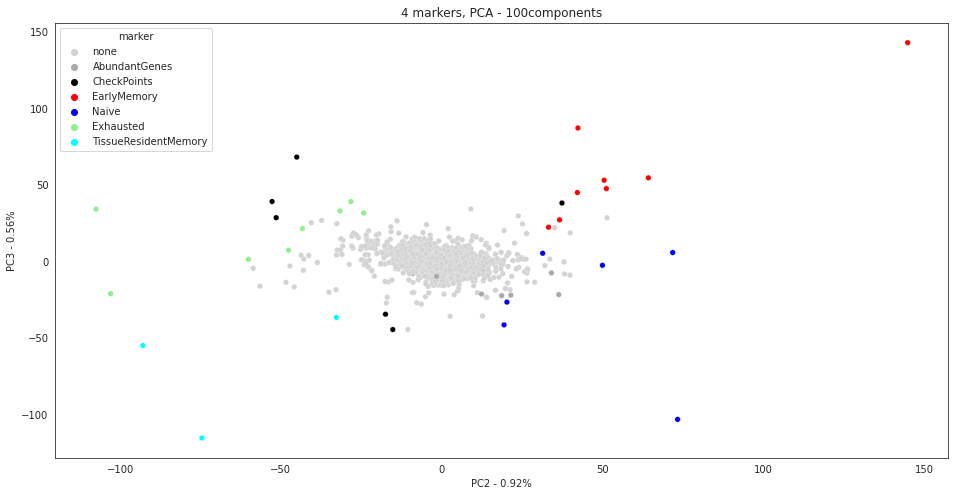

Printing UMAP maps... 
(2330, 2)
(2330, 10) (2330,) (2330,)


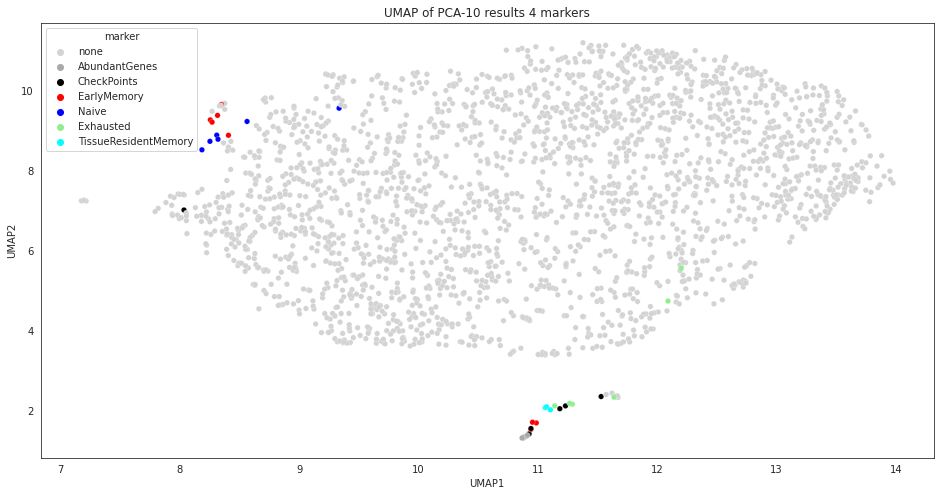

(2330, 2)
(2330, 50) (2330,) (2330,)


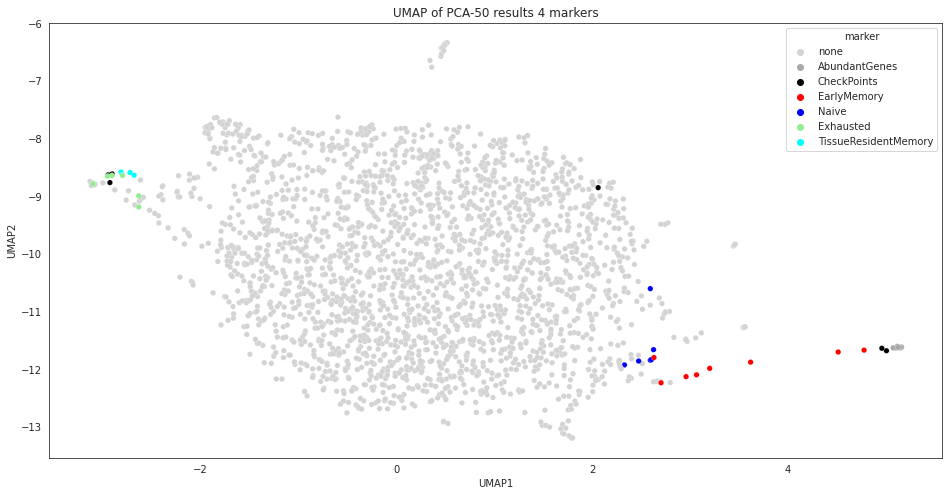

(2330, 2)
(2330, 100) (2330,) (2330,)


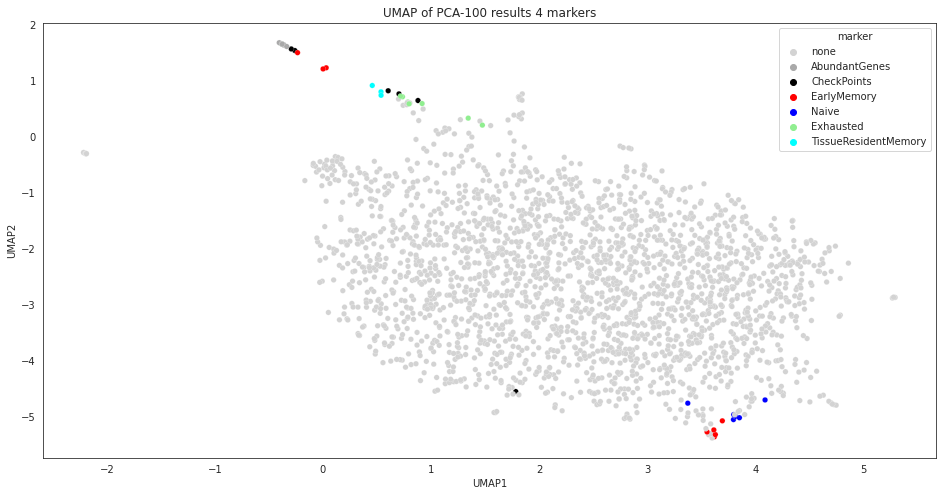

Running the Neural Network on the same params
Shape of the dataset for the modelling: (2330, 2183)
Shape of the train set: (2097, 2183), shape of the validation set (233, 2183)
CiteAutoencoder(
  (encoder): Encoder(
    (encoder_rna): LinBnDrop(
      (0): Linear(in_features=2183, out_features=400, bias=False)
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.1, inplace=False)
    )
    (encoder): LinBnDrop(
      (0): Linear(in_features=400, out_features=10, bias=False)
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (decoder): Decoder(
    (decoder): Sequential(
      (0): LinBnDrop(
        (0): Linear(in_features=10, out_features=400, bias=False)
        (1): LeakyReLU(negative_slope=0.01)
        (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

 67%|██████▋   | 10/15 [00:08<00:04,  1.17it/s]

Epoch 10: train loss 5.725921074435662; valid loss 5.651055573393858


100%|██████████| 15/15 [00:12<00:00,  1.16it/s]


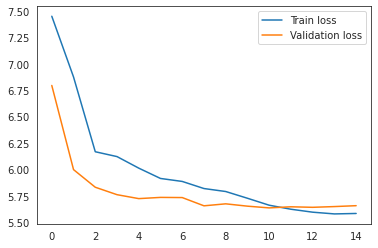

Encoding shape: (2330, 10)
Saving csv file with the results of NN modeling, dimensions 10, markers 6
(2330, 2)
(2330, 10) (2330,) (2330,)


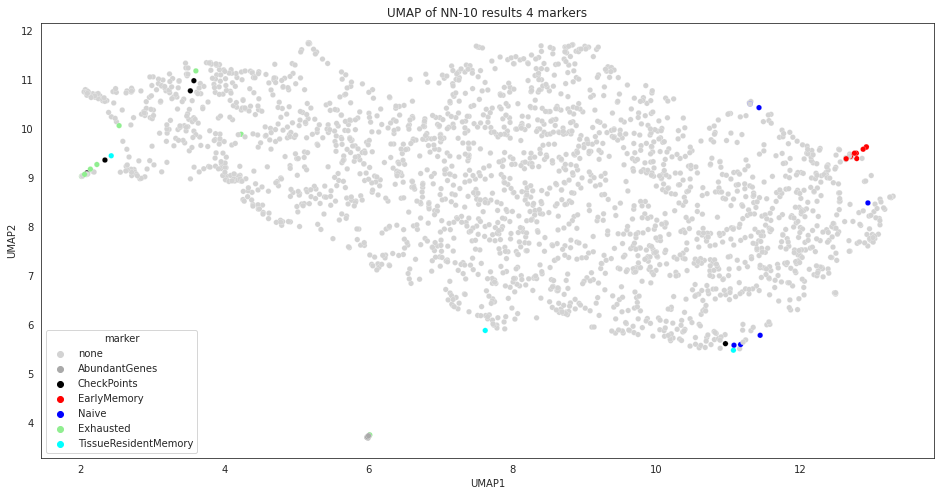

Shape of the dataset for the modelling: (2330, 2183)
Shape of the train set: (2097, 2183), shape of the validation set (233, 2183)
CiteAutoencoder(
  (encoder): Encoder(
    (encoder_rna): LinBnDrop(
      (0): Linear(in_features=2183, out_features=400, bias=False)
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.1, inplace=False)
    )
    (encoder): LinBnDrop(
      (0): Linear(in_features=400, out_features=50, bias=False)
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (decoder): Decoder(
    (decoder): Sequential(
      (0): LinBnDrop(
        (0): Linear(in_features=50, out_features=400, bias=False)
        (1): LeakyReLU(negative_slope=0.01)
        (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): LinBnDrop(
        (0): Li

 67%|██████▋   | 10/15 [00:08<00:04,  1.15it/s]

Epoch 10: train loss 5.427281746025249; valid loss 5.5801630490839225


100%|██████████| 15/15 [00:13<00:00,  1.14it/s]


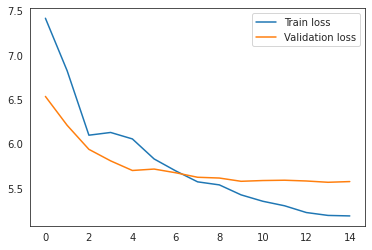

Encoding shape: (2330, 50)
Saving csv file with the results of NN modeling, dimensions 50, markers 6
(2330, 2)
(2330, 50) (2330,) (2330,)


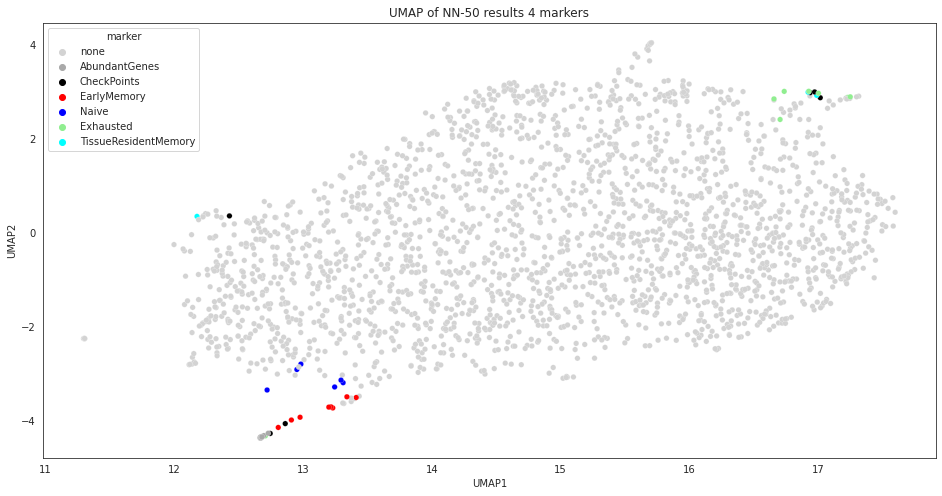

Shape of the dataset for the modelling: (2330, 2183)
Shape of the train set: (2097, 2183), shape of the validation set (233, 2183)
CiteAutoencoder(
  (encoder): Encoder(
    (encoder_rna): LinBnDrop(
      (0): Linear(in_features=2183, out_features=400, bias=False)
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.1, inplace=False)
    )
    (encoder): LinBnDrop(
      (0): Linear(in_features=400, out_features=100, bias=False)
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (decoder): Decoder(
    (decoder): Sequential(
      (0): LinBnDrop(
        (0): Linear(in_features=100, out_features=400, bias=False)
        (1): LeakyReLU(negative_slope=0.01)
        (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): LinBnDrop(
        (0):

 67%|██████▋   | 10/15 [00:08<00:04,  1.11it/s]

Epoch 10: train loss 5.277246099116407; valid loss 5.569248970997692


100%|██████████| 15/15 [00:13<00:00,  1.12it/s]


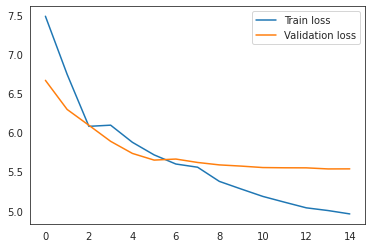

Encoding shape: (2330, 100)
Saving csv file with the results of NN modeling, dimensions 100, markers 6
(2330, 2)
(2330, 100) (2330,) (2330,)


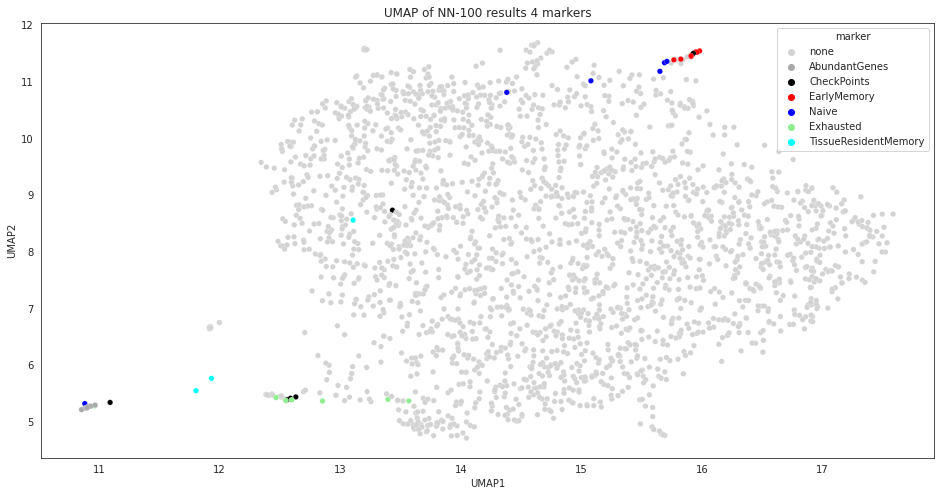

In [ ]:
# specify the index of the dataset you need to run the code
#index_dataset = 0
print(f'Running data preparation for {num_markers} markers')
datasets = ['NSCLC', 'crc1', 'crc2', 'hepa', 'mel']
dataset_name = datasets[index_dataset]
home_path = '/content/gdrive/MyDrive/CPP_data/'

path_dataset = '/content/gdrive/MyDrive/CPP_data/data_' + datasets[index_dataset] + '_filtered.gzip'
path_labels = '/content/gdrive/MyDrive/CPP_data/labels_' + datasets[index_dataset]

#cell_name_to_filter = 'TTC'  #dataset is filtered already
main_markers = ['EarlyMemory', 'Exhausted','Naive','TissueResidentMemory']
check_points = ['CheckPoints']
markers_check = ['AbundantGenes']
if num_markers == 4:
  color_marker = {'none':'lightgray', 'Naive': 'blue', 'Exhausted': 'lightgreen', 'TissueResidentMemory': 'cyan', 
                        'EarlyMemory': 'red', 'CheckPoints': 'black', 'AbundantGenes': 'darkgray'}
  markers = markers_four
else:                        
  color_marker = {'none':'lightgray', 'Naive': 'blue', 'Exhausted': 'lightgreen', 'TissueResidentMemory': 'cyan', 
                        'EarlyMemory': 'red','TEM': 'purple','CirculatingMemory': 'darkgreen',
                        'Cycling': 'yellow', 'CheckPoints': 'black', 'AbundantGenes': 'darkgray'}
  markers = markers_last

thresholds={'NSCLC':[0.71, 2.1], 'crc1':[0.71, 2.1], 'crc2':[0.8, 1.9], 
            'hepa':[0.849, 1.9], 'mel' :[0.71, 2.1]}
#NSCLC thresholds 1.2998407729691086/0.7345407510056047 = 1.76
#CRC2 thresholds 1.346980341580908/0.8146161428779355 = 1.65
#hepa thresholds 1.3892587059716444 / 0.8494661794810161 = 1.63

#BASIC PIPELINE: PREPROCESSING (filtering by some genes), PREPARING FOR PCA
dataset_filtered = prepare_dataset(home_path, path_dataset, path_labels, datasets[index_dataset], markers)
dataset_filtered.head
training_set, var_df = prep_data_PCA(home_path, path_dataset, dataset_name, markers, thresholds[dataset_name][0], thresholds[dataset_name][1])

n = input('Check the thresholds? Y/N')
if n.lower() == 'y':
   #check_var_thresh(var_df,0.849, 1.9)
    pass
else:
    print(f'Running PCA for {dims} dimensions')
    pca_df, var_pc = running_PCA(training_set, home_path, dims[-1])
    for dim_size in dims:
      pca_to_print=pca_df[pca_df.columns[:dim_size]].copy()
      pca_to_print = pd.concat([pca_to_print, pca_df[pca_df.columns[-2:]]], axis=1)
      title = str(len(markers)) + ' markers, PCA - ' + str(dim_size) +'components'
      plotting_res_sns(pca_to_print, var_pc[:dim_size], 'PC2', 'PC3',color_marker, title)
      plotting_res_plotly(pca_df, var_pc, 'PC2', 'PC3',color_marker, title)  

    print('Printing UMAP maps... ')
    for dim_size in dims:
      title = 'UMAP of PCA-' + str(dim_size) + ' results ' + str(num_markers) + ' markers'
      umap_embedding(pca_df[pca_df.columns[:dim_size]], pca_df['gene'], pca_df['marker'], title)


    print('Running the Neural Network on the same params')
    for dim_size in dims:
      model, X_nn, gene_labels_fin, gene_markers_fin = data_prep_train_for_NN(training_set, dim_size, n_epochs=15)
      encodings = test_NN_print_result(model, X_nn, gene_labels_fin, gene_markers_fin, dim_size)
      title = 'UMAP of NN-' + str(dim_size) + ' results ' + str(num_markers) + ' markers'
      umap_embedding(encodings, gene_labels_fin, gene_markers_fin, title)


(2334, 2)
(2334, 50) (2334,) (2334,)


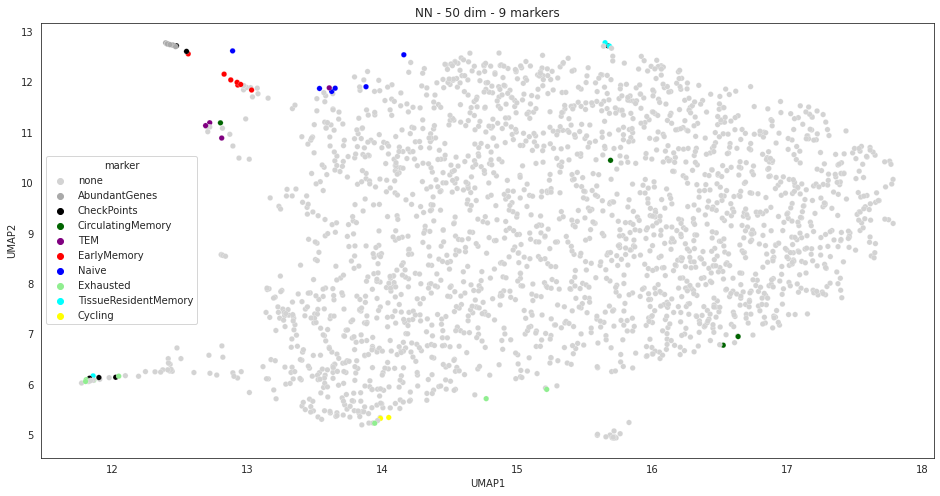

In [ ]:
num_markers = 7
if num_markers == 4:
  color_marker = {'none':'lightgray', 'Naive': 'blue', 'Exhausted': 'lightgreen', 'TissueResidentMemory': 'cyan', 
                        'EarlyMemory': 'red', 'CheckPoints': 'black', 'AbundantGenes': 'darkgray'}
  markers = markers_four
else:                        
  color_marker = {'none':'lightgray', 'Naive': 'blue', 'Exhausted': 'lightgreen', 'TissueResidentMemory': 'cyan', 
                        'EarlyMemory': 'red','TEM': 'purple','CirculatingMemory': 'darkgreen',
                        'Cycling': 'yellow', 'CheckPoints': 'black', 'AbundantGenes': 'darkgray'}
  markers = markers_last

NSCLC_NN_9_100 = pd.read_csv('NSCLC_9_NN_100_15-04_13:08.csv')

NSCLC_NN_9_50 = pd.read_csv('NSCLC_9_NN_50_15-04_13:07.csv')
encodings = NSCLC_NN_9_50[NSCLC_NN_9_50.columns[1:51]]
gene_markers_fin = NSCLC_NN_9_50.gene
gene_labels_fin = NSCLC_NN_9_50.marker
umap_embedding(encodings, gene_labels_fin, gene_markers_fin, 'NN - 50 dim - 9 markers')

#To check the closest genes to CYCLING and TRM (from embedding)

In [ ]:
from scipy.spatial.distance import cdist
def find_closest(data, class_name, emd_size, distance='euclidean', topN=10):
  target_genes = data[data.marker == class_name]
  trgt_genes_np = target_genes[target_genes.columns[:emd_size]].to_numpy()
  indexes_trgt=target_genes.index.values
  print(f'Target indexes: {indexes_trgt}')
  all_genes_np = data.drop(index=indexes_trgt, axis=0)
  all_genes_np = all_genes_np[all_genes_np.columns[:emd_size]].to_numpy()
  print(all_genes_np.shape, trgt_genes_np.shape)
  Y = cdist(all_genes_np, trgt_genes_np, distance)
  print(Y[:100, 0], Y[:100, 0])
  
  for i in range(Y.shape[1]):
    indexs_topN=np.argsort(Y[:, i])[:topN]
    print(f'Top indexes of min distances for gene #{i+1} are: {indexs_topN}')
    if i==0: 
      closest_genes = pd.DataFrame(data=data.gene.iloc[indexs_topN])
      closest_genes['distance'] = Y[indexs_topN, i]
      closest_genes['center_gene'] = data.gene.iloc[indexes_trgt[i]]
    else: 
      closest_genes_tmp = pd.DataFrame(data=data.gene.iloc[indexs_topN])
      closest_genes_tmp['distance'] = Y[indexs_topN, i]
      closest_genes_tmp['center_gene'] = data.gene.iloc[indexes_trgt[i]]
      closest_genes = pd.concat([closest_genes, closest_genes_tmp])
      
  return closest_genes





In [ ]:
#To choose the embedding where to find the closest genes

In [ ]:
NSCLC_data = pd.read_csv('NSCLC_6_NN_50_15-04_13:33.csv')
NSCLC_data.drop(columns='Unnamed: 0', axis=1, inplace=True)
closest = find_closest(NSCLC_data, 'TissueResidentMemory', 50, distance='euclidean', topN=10)
closest.to_csv('TRM-NN50-euclidean.csv')
closest = find_closest(NSCLC_data, 'TissueResidentMemory', 50, distance='cosine', topN=10)
closest.to_csv('TRM-NN50-cosine.csv')

NSCLC_data = pd.read_csv('NSCLC_6_NN_100_15-04_13:33.csv')
NSCLC_data.drop(columns='Unnamed: 0', axis=1, inplace=True)
closest = find_closest(NSCLC_data, 'TissueResidentMemory', 100, distance='euclidean', topN=10)
closest.to_csv('TRM-NN100-euclidean.csv')
closest = find_closest(NSCLC_data, 'TissueResidentMemory', 100, distance='cosine', topN=10)
closest.to_csv('TRM-NN100-cosine.csv')

NSCLC_data = pd.read_csv('NSCLC_9_NN_50_15-04_13:07.csv')
NSCLC_data.drop(columns='Unnamed: 0', axis=1, inplace=True)
closest = find_closest(NSCLC_data, 'TissueResidentMemory', 50, distance='euclidean', topN=10)
closest.to_csv('TRM-9_NN50-euclidean.csv')
closest = find_closest(NSCLC_data, 'TissueResidentMemory', 50, distance='cosine', topN=10)
closest.to_csv('TRM-9_NN50-cosine.csv')

NSCLC_data = pd.read_csv('NSCLC_9_NN_100_15-04_13:08.csv')
NSCLC_data.drop(columns='Unnamed: 0', axis=1, inplace=True)
closest = find_closest(NSCLC_data, 'TissueResidentMemory', 100, distance='euclidean', topN=10)
closest.to_csv('TRM-9_NN100-euclidean.csv')
closest = find_closest(NSCLC_data, 'TissueResidentMemory', 100, distance='cosine', topN=10)
closest.to_csv('TRM-9_NN100-cosine.csv')



Target indexes: [638 915 917]
(2331, 100) (3, 100)
Top indexes of min distances for gene #1 are: [  94 1025 2224 2185 1019  947  153 2108  812    5]
Top indexes of min distances for gene #2 are: [2224 1019 1285 1025 2108  261  375 1336  522  702]
Top indexes of min distances for gene #3 are: [  94 2213 2185  947 2180 1019 1025  467  261 1791]
Target indexes: [638 915 917]
(2331, 100) (3, 100)
Top indexes of min distances for gene #1 are: [  94 1025 2185  662 2108 2224 2179 1558 2180 2213]
Top indexes of min distances for gene #2 are: [2224   94 1019 1025 1285  261 2108 2213  375 1336]
Top indexes of min distances for gene #3 are: [  94 2213  662 2211 2179 2185 1558 2180    2 1019]


In [ ]:
NSCLC_data = pd.read_csv('NSCLC_9_NN_50_15-04_13:07.csv')
NSCLC_data.drop(columns='Unnamed: 0', axis=1, inplace=True)
closest = find_closest(NSCLC_data, 'Cycling', 50, distance='euclidean', topN=10)
closest.to_csv('CYCL-9_NN50-euclidean.csv')
closest = find_closest(NSCLC_data, 'Cycling', 50, distance='cosine', topN=10)
closest.to_csv('CYCL-9_NN50-cosine.csv')

NSCLC_data = pd.read_csv('NSCLC_9_NN_100_15-04_13:08.csv')
NSCLC_data.drop(columns='Unnamed: 0', axis=1, inplace=True)
closest = find_closest(NSCLC_data, 'Cycling', 100, distance='euclidean', topN=10)
closest.to_csv('CYCL-9_NN100-euclidean.csv')
closest1 = find_closest(NSCLC_data, 'Cycling', 100, distance='cosine', topN=10)
closest.to_csv('CYCL-9_NN100-cosine.csv')



In [ ]:
NSCLC_data = pd.read_csv('NSCLC_9_NN_50_15-04_13:07.csv')
NSCLC_data.drop(columns='Unnamed: 0', axis=1, inplace=True)
closest1 = find_closest(NSCLC_data, 'Cycling', 50, distance='euclidean', topN=10)
closest1['Embd_size'] = 50
closest1['Distance'] = 'euclidean'
NSCLC_data = pd.read_csv('NSCLC_9_NN_100_15-04_13:08.csv')
NSCLC_data.drop(columns='Unnamed: 0', axis=1, inplace=True)
closest2 = find_closest(NSCLC_data, 'Cycling', 100, distance='euclidean', topN=10)
closest2['Embd_size'] = 100
closest2['Distance'] = 'euclidean'
closest_CYCL = pd.concat([closest1, closest2])
closest_CYCL.gene.value_counts()

closest_CYCL.to_csv('CYCL-9_NN50-100-eucl.csv')


In [ ]:
NSCLC_data = pd.read_csv('NSCLC_9_NN_50_15-04_13:07.csv')
NSCLC_data.drop(columns='Unnamed: 0', axis=1, inplace=True)
closest1 = find_closest(NSCLC_data, 'Cycling', 50, distance='cosine', topN=10)
closest1['Embd_size'] = 50
closest1['Distance'] = 'cosine'
NSCLC_data = pd.read_csv('NSCLC_9_NN_100_15-04_13:08.csv')
NSCLC_data.drop(columns='Unnamed: 0', axis=1, inplace=True)
closest2 = find_closest(NSCLC_data, 'Cycling', 100, distance='cosine', topN=10)
closest2['Embd_size'] = 100
closest2['Distance'] = 'cosine'
closest_CYCL = pd.concat([closest1, closest2])
closest_CYCL.gene.value_counts()

closest_CYCL.to_csv('CYCL-9_NN50-100-cosine.csv')


In [ ]:
NSCLC_data = pd.read_csv('NSCLC_9_NN_50_15-04_13:07.csv')
NSCLC_data.drop(columns='Unnamed: 0', axis=1, inplace=True)
closest_eu1 = find_closest(NSCLC_data, 'TissueResidentMemory', 50, distance='euclidean', topN=10)
closest_eu1['Embd_size'] = 50
closest_eu1['Distance'] = 'euclidean'
closest_cos1 = find_closest(NSCLC_data, 'TissueResidentMemory', 50, distance='cosine', topN=10)
closest_cos1['Embd_size'] = 50
closest_cos1['Distance'] = 'cosine'

NSCLC_data = pd.read_csv('NSCLC_9_NN_100_15-04_13:08.csv')
NSCLC_data.drop(columns='Unnamed: 0', axis=1, inplace=True)
closest_eu2 = find_closest(NSCLC_data, 'TissueResidentMemory', 100, distance='euclidean', topN=10)
closest_eu2['Embd_size'] = 100
closest_eu2['Distance'] = 'euclidean'
closest_cos2 = find_closest(NSCLC_data, 'TissueResidentMemory', 100, distance='cosine', topN=10)
closest_cos2['Embd_size'] = 100
closest_cos2['Distance'] = 'cosine'

closest_TRM_eu = pd.concat([closest_eu1, closest_eu2])
closest_TRM_eu.gene.value_counts()

closest_TRM_cos = pd.concat([closest_cos1, closest_cos2])
closest_TRM_cos.gene.value_counts()


closest_TRM_eu.to_csv('TRM-9_NN50-100-eucl.csv')
closest_TRM_cos.to_csv('TRM-9_NN50-100-cos.csv')




In [ ]:
a = pd.read_csv('TRM-9_NN50-100_25-04.csv', index_col='index')
b = pd.read_csv('CYCL-9_NN50-100_25-04.csv', index_col='index')
a.loc[(a.Embd_size == 50)&(a.Distance == 'euclidean')]
a.loc[a.gene == 'LINC00892']


list_V = ['MSC-AS1', 'LOC100133286', 'PCNA-AS1','ZHX1-C8orf76','POP7','BCKDK','NDC80','PRDX4','SMC2','DUSP12']
b.loc[b.gene.isin(list_V)]


Unnamed: 0   gene center_gene  Embd_size   Distance
index                                                     
145             2   SMC2       MKI67         50  euclidean
97              8   POP7       MKI67         50  euclidean
145            10   SMC2       TOP2A         50  euclidean
116            15  NDC80       TOP2A         50  euclidean
145            21   SMC2       MKI67        100  euclidean
145            35   SMC2       TOP2A        100  euclidean
2              42   SMC2       MKI67         50     cosine
10             50   SMC2       TOP2A         50     cosine
15             55  NDC80       TOP2A         50     cosine
22             62   SMC2       MKI67        100     cosine
32             72   SMC2       TOP2A        100     cosine

In [ ]:
NSCLC_data = pd.read_csv('NSCLC_9_NN_50_15-04_13:07.csv', index_col=0)
NSCLC_data1 = pd.read_csv('NSCLC_9_NN_100_15-04_13:08.csv', index_col=0)

#NSCLC_data.drop(columns='Unnamed: 0', axis=1, inplace=True)
closest = find_closest(NSCLC_data, 'Cycling', 50, distance='euclidean', topN=10)
closest['Embd_size'] = 50
closest['Metric'] = 'euclidean'
closest.reset_index(inplace=True)
closest.loc[closest.gene.isin(list_V)]

closest1 = find_closest(NSCLC_data, 'Cycling', 50, distance='cosine', topN=10)
closest1['Embd_size'] = 50
closest1['Metric'] = 'cosine'
closest1.reset_index(inplace=True)

closest2 = find_closest(NSCLC_data1, 'Cycling', 100, distance='cosine', topN=10)
closest2['Embd_size'] = 100
closest2['Metric'] = 'cosine'
closest2.reset_index(inplace=True)

closest3 = find_closest(NSCLC_data1, 'Cycling', 100, distance='euclidean', topN=10)
closest3['Embd_size'] = 100
closest3['Metric'] = 'euclidean'
closest3.reset_index(inplace=True)

CYCL_9_NN50 = pd.concat([closest, closest1, closest2, closest3], axis=0)
CYCL_9_NN50[CYCL_9_NN50.Embd_size == 50]
CYCL_9_NN50.to_csv('CYCL_9_NN50-100-25-04.csv')

index     gene   distance center_gene  Embd_size     Metric
0     259     CKS2  11.695455       MKI67         50  euclidean
1    1112   ZDHHC2  12.270371       MKI67         50  euclidean
2     145     SMC2  12.538670       MKI67         50  euclidean
3    1840  PLEKHF2  12.742317       MKI67         50  euclidean
4    2128   EIF2B2  12.821827       MKI67         50  euclidean
..    ...      ...        ...         ...        ...        ...
15    145     SMC2   6.835743       TOP2A        100  euclidean
16    712     ELP4   7.026028       TOP2A        100  euclidean
17    818    ATAD2   7.122132       TOP2A        100  euclidean
18    565   NCAPD3   7.144307       TOP2A        100  euclidean
19    596    SUZ12   7.157090       TOP2A        100  euclidean

[80 rows x 6 columns]

In [ ]:
closest = find_closest(NSCLC_data, 'TissueResidentMemory', 50, distance='euclidean', topN=10)
closest['Embd_size'] = 50
closest['Metric'] = 'euclidean'
closest.reset_index(inplace=True)
closest.loc[closest.gene.isin(list_V)]

closest1 = find_closest(NSCLC_data, 'TissueResidentMemory', 50, distance='cosine', topN=10)
closest1['Embd_size'] = 50
closest1['Metric'] = 'cosine'
closest1.reset_index(inplace=True)

closest2 = find_closest(NSCLC_data1, 'TissueResidentMemory', 100, distance='cosine', topN=10)
closest2['Embd_size'] = 100
closest2['Metric'] = 'cosine'
closest2.reset_index(inplace=True)

closest3 = find_closest(NSCLC_data1, 'TissueResidentMemory', 100, distance='euclidean', topN=10)
closest3['Embd_size'] = 100
closest3['Metric'] = 'euclidean'
closest3.reset_index(inplace=True)

TRM_9_NN50 = pd.concat([closest, closest1, closest2, closest3], axis=0)
#TRM_9_NN50[TRM_9_NN50.Embd_size == 50]
TRM_9_NN50.to_csv('TRM_9_NN50-100-25-04.csv')

index       gene   distance center_gene  Embd_size     Metric
0      94       CD96  20.909360      ZNF683         50  euclidean
1       5  LINC00892  22.205426      ZNF683         50  euclidean
2     153      CD226  22.826488      ZNF683         50  euclidean
3    2224    SLC38A5  22.859752      ZNF683         50  euclidean
4     438      DUSP6  22.883515      ZNF683         50  euclidean
..    ...        ...        ...         ...        ...        ...
25   1019        MYC  24.315749       ITGAE        100  euclidean
26   1025       NAB1  25.455133       ITGAE        100  euclidean
27    467      TIGIT  25.504881       ITGAE        100  euclidean
28    261       CLNK  25.707465       ITGAE        100  euclidean
29   1791      NUP37  25.927334       ITGAE        100  euclidean

[120 rows x 6 columns]

# Sum by columns check

In [ ]:
data_crc1_filtered = pd.read_parquet('/content/gdrive/MyDrive/CPP_data/data_crc1_filtered.gzip')  
data_crc1_filtered.sum(axis=0)

GENE               A1BGNAT2ADAAKT3MED6NAALAD2DDTLNAALADL1GUSBP9SI...
P_N_P0305_00203                                         13800.812411
P_P_P0305_00238                                         20100.811016
P_P_P0305_00338                                         16980.031943
P_P_P0305_00343                                         16557.005879
                                         ...                        
P_T_P1228_11149                                         19237.320518
P_T_P1228_11154                                          17590.19341
P_T_P1228_11159                                         17464.114099
P_T_P1228_11160                                           17197.3636
P_T_P1228_11164                                         17583.298946
Length: 2474, dtype: object

In [ ]:
data_crc2_filtered = pd.read_parquet('/content/gdrive/MyDrive/CPP_data/data_crc2_filtered.gzip')  
data_crc2_filtered.sum(axis=0)

symbol             A1BGNAT2ADACDH2AKT3GAGE12FZBTB11-AS1MED6NR2E3N...
NTC100-20180123                                            1000000.0
NTC101-20180123                                            1000000.0
NTC102-20180123                                            1000000.0
NTC103-20180123                                            1000000.0
                                         ...                        
PTC91-20161228                                             1000000.0
PTC9-20161228                                              1000000.0
PTC92-20161228                                             1000000.0
PTC94-20161228                                             1000000.0
PTC96-20161228                                             1000000.0
Length: 3708, dtype: object

In [ ]:
data_hepa_filtered = pd.read_parquet('/content/gdrive/MyDrive/CPP_data/data_hepa_filtered.gzip')  
data_hepa_filtered.sum(axis=0)

symbol         A1BGNAT2ADACDH2AKT3GAGE12FZBTB11-AS1MED6NR2E3N...
PTC141-0205                                            1000000.0
PTC142-0205                                            1000000.0
PTC143-0205                                            1000000.0
PTC144-0205                                            1000000.0
                                     ...                        
PTC37-0508                                             1000000.0
PTC39-0508                                             1000000.0
PTC40-0508                                             1000000.0
TTC26-0508                                             1000000.0
TTC74-0508                                             1000000.0
Length: 1634, dtype: object

In [ ]:
data_NSCLC_filtered = pd.read_parquet('/content/gdrive/MyDrive/CPP_data/data_NSCLC_filtered.gzip')  
data_NSCLC_filtered.sum(axis=0)

symbol            A1BGNAT2ADACDH2AKT3GAGE12FZBTB11-AS1MED6NR2E3N...
TTC100-0616A                                             1000000.12
TTC10-0616A                                              1000000.27
TTC101-0616A                                              999999.92
TTC102-0616A                                              999999.91
                                        ...                        
TTC63-20171219                                           1000000.15
TTC64-20171219                                            999999.84
TTC7-20171219                                            1000000.16
TTC8-20171219                                            1000000.07
TTC9-20171219                                             999999.89
Length: 2183, dtype: object

In [ ]:
data_mel_filtered = pd.read_parquet('/content/gdrive/MyDrive/CPP_data/data_mel_filtered.gzip')  
data_mel_filtered.sum(axis=0)

Gene                          TSPAN6TNMDDPM1SCYL3C1orf112FGRCFHFUCA2GCLCNFYA...
A12_P6_M11                                                              18240.4
A2_P4_M11                                                              15494.28
A4_P3_M11                                                              21295.04
A4_P4_M11                                                               17111.7
                                                    ...                        
F1_P5_M67_L001_T_enriched                                              24675.67
G12_P5_M67_L001_T_enriched                                             20759.87
G5_P5_M67_L001_T_enriched                                               16423.6
H7_P5_M67_L001_T_enriched                                              20217.66
H8_P5_M67_L001_T_enriched                                               8411.66
Length: 6462, dtype: object

# Finding the variance and std ratio

In [ ]:
data_NSCLC = pd.read_parquet('/content/gdrive/MyDrive/CPP_data/NSCLC_filtered_markers.gzip')
data_NSCLC.drop(['marker_four'], axis=1, inplace=True)
data_NSCLC.iloc[:, 1:-1] = np.log2(data_NSCLC.iloc[:, 1:-1] + 1)
data_NSCLC.shape

all_mrkrs_lst = np.concatenate([value for value in markers_last.values()])
#len(all_mrkrs_lst) = 49
ds_mean = data_NSCLC.mean(axis=1,skipna=True, numeric_only=True).to_frame()
ds_mean.rename(columns={0:'Mean'}, inplace=True)
ds_mean['Std'] = data_NSCLC.std(axis=1,skipna=True, numeric_only=True)
ds_mean['gene'] = data_NSCLC.gene

#ds_mean.reset_index(inplace=True)
min_mean = min_ratio = min_std = np.inf
for each in all_mrkrs_lst:
  mean = ds_mean.loc[(ds_mean.gene == each)]['Mean'].item()
  std = ds_mean.loc[(ds_mean.gene == each)]['Std'].item()
  ratio = ds_mean.loc[(ds_mean.gene == each)]['Std'].item() / mean
  if min_mean > mean:
    min_mean = mean
  if min_ratio > ratio:
    min_ratio = ratio
  if min_std > std:
    min_std = std


print(f'Minimum mean {min_mean}')
print(f'Minimum STD {min_std}')
print(f'Minimum ratio: {min_ratio}')
print(f'Median is: {ds_mean.quantile(q=0.5)}')


th_mean = 0.08932354038364426
th_std_ratio = 0.07654495310576391

thresholds={'NSCLC':[0.08932354038364426, 0.07654495310576391], 'crc1':[0.71, 2.1], 'crc2':[0.8, 1.9], 
            'hepa':[0.849, 1.9], 'mel' :[0.71, 2.1]}


training_set = data_NSCLC[(ds_mean.Mean>th_mean)&((ds_mean.Std/ds_mean.Mean)>th_std_ratio)]
print('Training set shape', training_set.shape)
print('Adding markers (check if they were deleted)')
training_set = add_markers(training_set, data_NSCLC, markers)
print('Final check')
check_markers(training_set, markers)
print('The final dataset shape for PCA and modeling: ', training_set.shape)
print('************************************************')
training_set = training_set.sort_index()
#########
#in case we need to re-arrange the columns:
cols = training_set.columns.to_list()
cols = cols[1:-2] + cols[:1] + cols[-1:]
training_set = training_set[cols]
#########
check_var_thresh(ds_mean,min_mean,min_ratio)

#now training set is ready for modelling 

Minimum mean 0.12886662874612861
Minimum STD 0.8364129687767843
Minimum ratio: 0.07654495310576383
Median is: Mean    0.141682
Std     0.910202
Name: 0.5, dtype: float64
Training set shape (11660, 2184)
Adding markers (check if they were deleted)
************************************************
Found gene that was absent. Adding it... ACTB
Total number of markers 49
Total number of markers added 1
************************************************
Final check
************************************************
Total markers for key Naive is: 6
Total markers for key EarlyMemory is: 7
Total markers for key Exhausted is: 7
Total markers for key TissueResidentMemory is: 3
Total markers for key TEM is: 5
Total markers for key Cycling is: 2
Total markers for key CirculatingMemory is: 4
Total markers for key AbundantGenes is: 9
Total markers for key CheckPoints is: 6
Total number of markers found 49
The main markers count  23
The Checkpoints count  6
The markers for check purposes count  9
*******

Shape of the dataset for the modelling: (11661, 2181)
Shape of the train set: (10494, 2181), shape of the validation set (1167, 2181)
CiteAutoencoder(
  (encoder): Encoder(
    (encoder_rna): LinBnDrop(
      (0): Linear(in_features=2181, out_features=400, bias=False)
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.1, inplace=False)
    )
    (encoder): LinBnDrop(
      (0): Linear(in_features=400, out_features=100, bias=False)
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (decoder): Decoder(
    (decoder): Sequential(
      (0): LinBnDrop(
        (0): Linear(in_features=100, out_features=400, bias=False)
        (1): LeakyReLU(negative_slope=0.01)
        (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): LinBnDrop(
        (

  7%|▋         | 10/150 [00:07<01:49,  1.28it/s]

Epoch 10: train loss 7.3484081418622855; valid loss 6.9008755095513745


 13%|█▎        | 20/150 [00:14<01:13,  1.76it/s]

Epoch 20: train loss 6.028324356209966; valid loss 5.656598565511041


 20%|██        | 30/150 [00:20<01:01,  1.95it/s]

Epoch 30: train loss 5.802440717557919; valid loss 5.483088098638775


 27%|██▋       | 40/150 [00:25<00:56,  1.96it/s]

Epoch 40: train loss 5.768760013743902; valid loss 5.461514769605622


 33%|███▎      | 50/150 [00:30<00:51,  1.95it/s]

Epoch 50: train loss 5.742084012159693; valid loss 5.451060605641604


 40%|████      | 60/150 [00:35<00:45,  1.98it/s]

Epoch 60: train loss 5.7270881362204005; valid loss 5.437149348581767


 47%|████▋     | 70/150 [00:40<00:39,  2.00it/s]

Epoch 70: train loss 5.699292587511467; valid loss 5.4421372793634015


 53%|█████▎    | 80/150 [00:45<00:35,  1.98it/s]

Epoch 80: train loss 5.661071837595901; valid loss 5.397760336891443


 60%|██████    | 90/150 [00:50<00:30,  1.97it/s]

Epoch 90: train loss 5.633254153446309; valid loss 5.382998879178529


 67%|██████▋   | 100/150 [00:55<00:24,  2.01it/s]

Epoch 100: train loss 5.629530474733848; valid loss 5.377886042394695


 73%|███████▎  | 110/150 [01:00<00:19,  2.01it/s]

Epoch 110: train loss 5.617230202962222; valid loss 5.380443642460186


 80%|████████  | 120/150 [01:05<00:15,  1.99it/s]

Epoch 120: train loss 5.600051879519301; valid loss 5.353423583987643


 87%|████████▋ | 130/150 [01:10<00:10,  1.96it/s]

Epoch 130: train loss 5.595474256068746; valid loss 5.351238054195427


 93%|█████████▎| 140/150 [01:15<00:04,  2.00it/s]

Epoch 140: train loss 5.561152750727379; valid loss 5.339003290390498


100%|██████████| 150/150 [01:20<00:00,  1.86it/s]

Epoch 150: train loss 5.549390596004811; valid loss 5.340285733916765


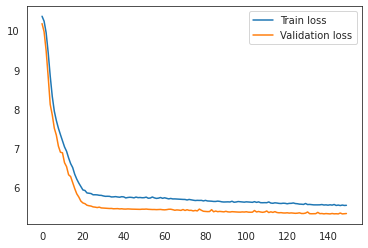

In [ ]:
#dims is preset variable that contains dimensions for which we want to run model
#random.seed(10)

for dim_size in dims:
  model, X_nn, gene_labels_fin, gene_markers_fin = data_prep_train_for_NN(training_set, dim_size, n_epochs=150, batch_size=128)
#  encodings = test_NN_print_result(model, X_nn, gene_labels_fin, gene_markers_fin, dim_size)
  #title = 'UMAP of NN-' + str(dim_size) + ' results ' + str(len(markers)) + ' markers'
 # umap_embedding(encodings, gene_labels_fin, gene_markers_fin, title)

#best_model_wts = copy.deepcopy(model.state_dict())
#torch.save(model.state_dict(), '/content/gdrive/MyDrive/CPP_data/model_26-04')
#model = torch.load(PATH)
#model.load_state_dict(best_model_wts)


Encoding shape: (11661, 100)
Saving csv file with the results of NN modeling, dimensions 100, markers 9
(11661, 2)
(11661, 100) (11661,) (11661,)


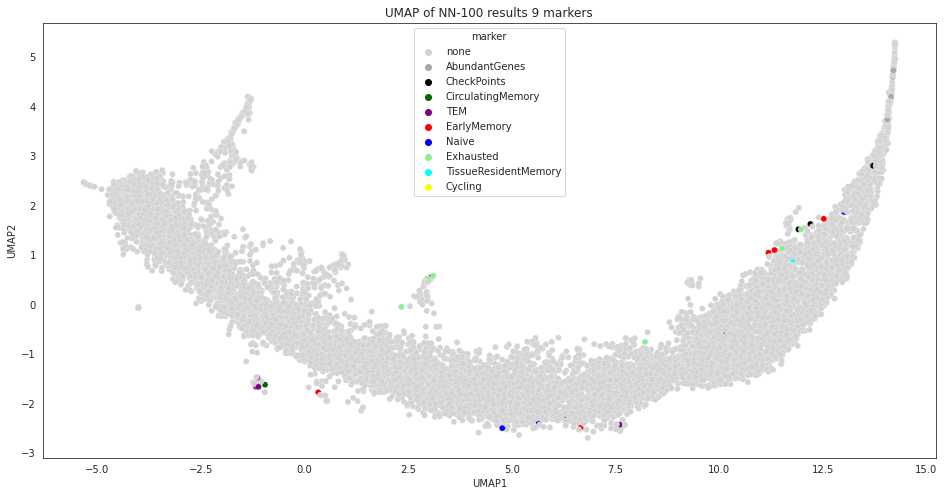

In [ ]:
#SAVING MODEL
best_model_wts = copy.deepcopy(model.state_dict())
torch.save(model.state_dict(), '/content/gdrive/MyDrive/CPP_data/model_100_26-04')
#model = torch.load(PATH)
#model.load_state_dict(best_model_wts)

encodings = test_NN_print_result(model, X_nn, gene_labels_fin, gene_markers_fin, dim_size)
title = 'UMAP of NN-' + str(dim_size) + ' results ' + str(len(markers)) + ' markers'
umap_embedding(encodings, gene_labels_fin, gene_markers_fin, title)





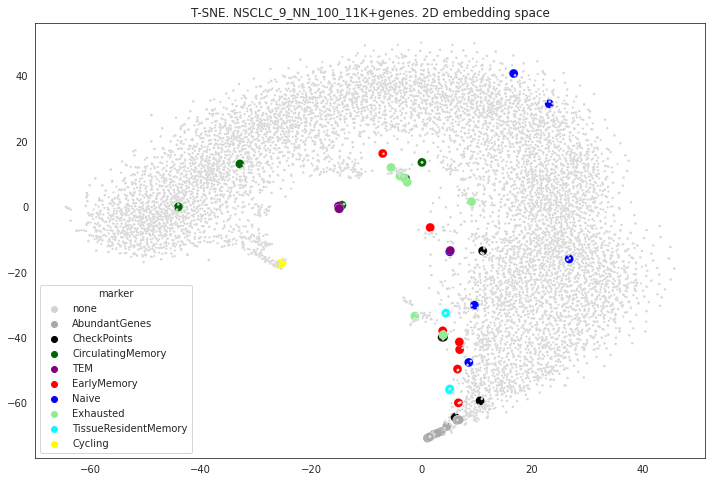

In [ ]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2) 
TRAIN = tsne.fit_transform(encodings)

plt.figure(figsize = (12,8))
sns.scatterplot(x = TRAIN[:,0], y = TRAIN[:,1], 
                hue = gene_markers_fin, s = np.where(gene_markers_fin == 'none',5,80),
                palette=color_marker)
plt.title('T-SNE. NSCLC_9_NN_100_11K+genes. 2D embedding space')
plt.show();


In [ ]:
columns = list(range(1, 101))
encodings_df = pd.DataFrame(data=encodings, columns=columns)

res = pd.concat([encodings_df, gene_labels_fin, gene_markers_fin], axis=1)
name_file= dataset_name +'_' + str(len(markers)) +'_NN_'+ str(100) + '_' + datetime.now().strftime("%d-%m_%H:%M") + '.csv'
res.to_csv(os.path.join(home_path, name_file))


'26-04_13:26.csv'

Datasets: 0 - NSCLC, 1- CRC1, 2- CRC2, 3- HEPA, 4-MELANOMA
Input the index of the dataset you are interested in: 0
Input how many different dimensions you want to check for PCA and NN (1, 2, 3, 4, 5?): 1
Input the number of dimensions for the 1 run (10-50-100?): 100
So, the following dimensions will be checked:  [100]
Dataset NSCLC. 
Running data preparation for 7 markers
Index(['symbol', 'TTC100-0616A', 'TTC10-0616A', 'TTC101-0616A',
       'TTC102-0616A'],
      dtype='object')
NSCLC  data shape: (23459, 2184)
************************************************
Filtering Mitochondrial and Mirna genes..
************************************************
The total number of genes filtered out by R[NUP] :  343
The total number of genes filtered out by MIR :  1258
The total number of genes filtered out by MT :  93
Final dataset shape:  (21765, 2184)
************************************************
************************************************
Total number of markers used 49
Adding markers.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



variance tables shape (21766, 1)
x_labels (21766,)
x_labels index RangeIndex(start=0, stop=21766, step=1)
genes_var index RangeIndex(start=0, stop=21766, step=1)
difference in indexes []
(21766, 2185)
variance tables shape (21766, 3)
variance table          Var      Mean       Std  gene
0   3.534065  0.839759  1.879911  A1BG
1   0.045334  0.008948  0.212918  NAT2
2  14.288587  2.343138  3.780025   ADA
3   0.003878  0.002864  0.062271  CDH2
4   3.796691  0.731008  1.948510  AKT3
variance tables shape (21766, 4)
************************************************
Training set shape (11660, 2185)
Adding markers (check if they were deleted)
************************************************
Found gene that was absent. Adding it... ACTB
Total number of markers 49
Total number of markers added 1
************************************************
************************************************
Total markers for key Naive is: 6
Total markers for key EarlyMemory is: 7
Total markers for key Exhausted 

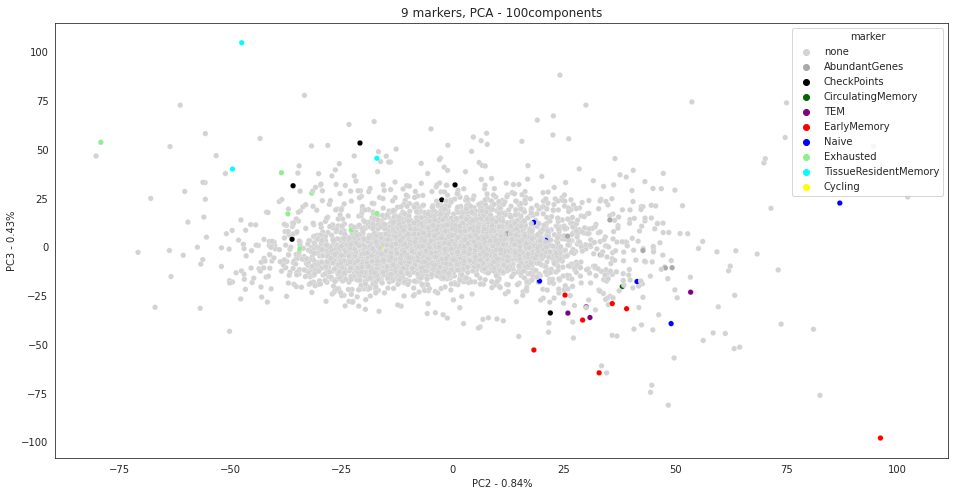

Printing UMAP maps... 
(11661, 2)
(11661, 100) (11661,) (11661,)


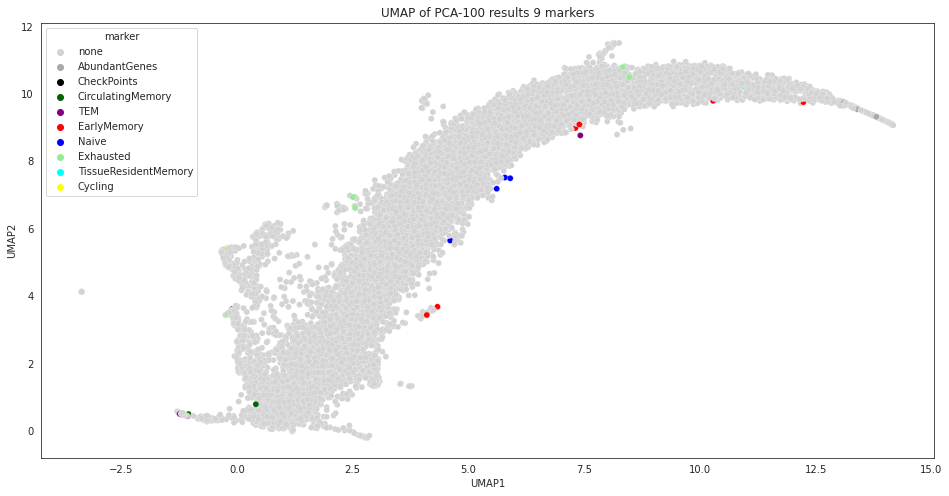

Running the Neural Network on the same params
Shape of the dataset for the modelling: (11661, 2183)
Shape of the train set: (10494, 2183), shape of the validation set (1167, 2183)
CiteAutoencoder(
  (encoder): Encoder(
    (encoder_rna): LinBnDrop(
      (0): Linear(in_features=2183, out_features=400, bias=False)
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.1, inplace=False)
    )
    (encoder): LinBnDrop(
      (0): Linear(in_features=400, out_features=100, bias=False)
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (decoder): Decoder(
    (decoder): Sequential(
      (0): LinBnDrop(
        (0): Linear(in_features=100, out_features=400, bias=False)
        (1): LeakyReLU(negative_slope=0.01)
        (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats

  3%|▎         | 10/300 [00:06<03:01,  1.59it/s]

Epoch 10: train loss 5.616871759735655; valid loss 5.618418169307627


  7%|▋         | 20/300 [00:12<02:49,  1.65it/s]

Epoch 20: train loss 5.446974526320455; valid loss 5.710917598484108


 10%|█         | 30/300 [00:18<02:43,  1.65it/s]

Epoch 30: train loss 5.2798423048244425; valid loss 5.388782955789116


 13%|█▎        | 40/300 [00:24<02:34,  1.69it/s]

Epoch 40: train loss 5.133003103544491; valid loss 5.3772054012759485


 17%|█▋        | 50/300 [00:30<02:27,  1.69it/s]

Epoch 50: train loss 5.078170004176348; valid loss 5.354359161373685


 20%|██        | 60/300 [00:36<02:24,  1.66it/s]

Epoch 60: train loss 5.012103331754702; valid loss 5.386467421269356


 23%|██▎       | 70/300 [00:42<02:15,  1.69it/s]

Epoch 70: train loss 4.995404936777925; valid loss 5.434166279631797


 27%|██▋       | 80/300 [00:48<02:11,  1.67it/s]

Epoch 80: train loss 4.949803953696051; valid loss 5.398015910780318


 30%|███       | 90/300 [00:54<02:07,  1.65it/s]

Epoch 90: train loss 4.957707303034275; valid loss 5.3744137910256145


 33%|███▎      | 100/300 [01:00<02:01,  1.64it/s]

Epoch 100: train loss 4.906122214275699; valid loss 5.402957616346763


 37%|███▋      | 110/300 [01:06<01:54,  1.66it/s]

Epoch 110: train loss 4.863883159536395; valid loss 5.38414202659888


 40%|████      | 120/300 [01:12<01:49,  1.65it/s]

Epoch 120: train loss 4.871165234042459; valid loss 5.405845421854001


 43%|████▎     | 130/300 [01:18<01:42,  1.65it/s]

Epoch 130: train loss 4.851759514536929; valid loss 5.413093577109552


 47%|████▋     | 140/300 [01:24<01:37,  1.65it/s]

Epoch 140: train loss 4.835490872343313; valid loss 5.390157525521011


 50%|█████     | 150/300 [01:31<01:33,  1.61it/s]

Epoch 150: train loss 4.803413248889124; valid loss 5.4332907988459205


 53%|█████▎    | 160/300 [01:37<01:26,  1.62it/s]

Epoch 160: train loss 4.772739296075796; valid loss 5.422697644613702


 57%|█████▋    | 170/300 [01:43<01:20,  1.62it/s]

Epoch 170: train loss 4.756113694966896; valid loss 5.453984773966014


 60%|██████    | 180/300 [01:49<01:11,  1.68it/s]

Epoch 180: train loss 4.739908953132869; valid loss 5.436798745582731


 63%|██████▎   | 190/300 [01:55<01:04,  1.69it/s]

Epoch 190: train loss 4.731336553278073; valid loss 5.430665314861517


 67%|██████▋   | 200/300 [02:01<00:59,  1.68it/s]

Epoch 200: train loss 4.712262122817827; valid loss 5.4486745797167915


 70%|███████   | 210/300 [02:07<00:53,  1.69it/s]

Epoch 210: train loss 4.693227386256502; valid loss 5.4521702516763355


 73%|███████▎  | 220/300 [02:13<00:48,  1.67it/s]

Epoch 220: train loss 4.671219169150676; valid loss 5.460068132699608


 77%|███████▋  | 230/300 [02:19<00:42,  1.64it/s]

Epoch 230: train loss 4.6661598524730135; valid loss 5.468567232239828


 80%|████████  | 240/300 [02:25<00:35,  1.67it/s]

Epoch 240: train loss 4.647833397939634; valid loss 5.485567289636803


 83%|████████▎ | 250/300 [02:31<00:29,  1.70it/s]

Epoch 250: train loss 4.638765604445565; valid loss 5.480157825409497


 87%|████████▋ | 260/300 [02:37<00:23,  1.69it/s]

Epoch 260: train loss 4.630081125684345; valid loss 5.49545776016608


 90%|█████████ | 270/300 [02:43<00:18,  1.66it/s]

Epoch 270: train loss 4.6255526064645; valid loss 5.489438510492712


 93%|█████████▎| 280/300 [02:49<00:11,  1.69it/s]

Epoch 280: train loss 4.61620822469916; valid loss 5.491366878777564


 97%|█████████▋| 290/300 [02:55<00:05,  1.67it/s]

Epoch 290: train loss 4.615201674712734; valid loss 5.500412313572443


100%|██████████| 300/300 [03:01<00:00,  1.65it/s]

Epoch 300: train loss 4.607744714748934; valid loss 5.498174976056319


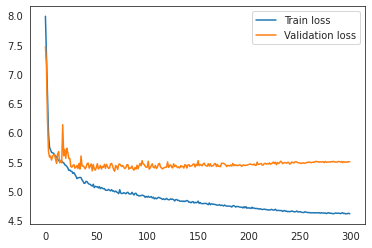

Encoding shape: (11661, 100)
Saving csv file with the results of NN modeling, dimensions 100, markers 9
(11661, 2)
(11661, 100) (11661,) (11661,)


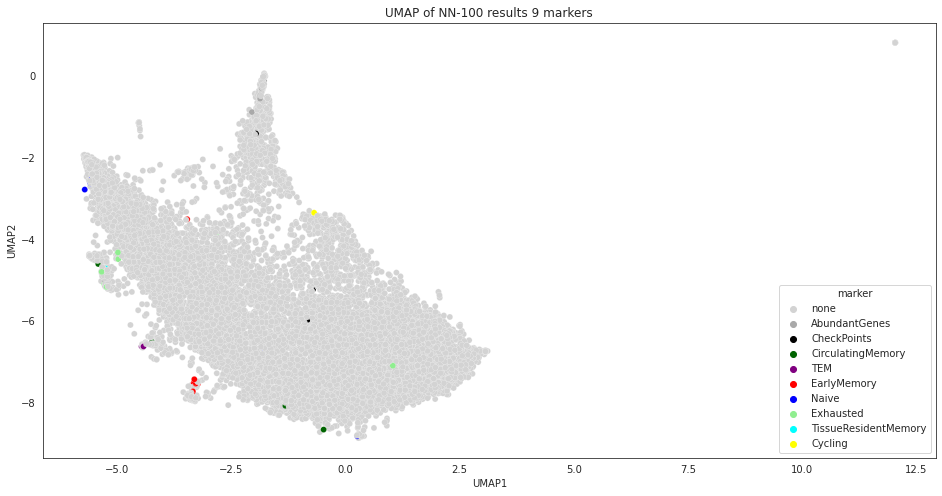

In [ ]:
#mean = 0.12886662874612861
#ratio = 0.07654495310576383

mean = 0.08932354038364426
ratio = 0.07654495310576391
batch_size=128
n_epochs=300

num_markers = [7]
print('Datasets: 0 - NSCLC, 1- CRC1, 2- CRC2, 3- HEPA, 4-MELANOMA')
index_dataset = int(input('Input the index of the dataset you are interested in: '))
n = int(input('Input how many different dimensions you want to check for PCA and NN (1, 2, 3, 4, 5?): '))
dims=np.zeros(n, dtype=int)
for i in range(n):
  dims[i]=int(input(f'Input the number of dimensions for the {i+1} run (10-50-100?): '))
print(f'So, the following dimensions will be checked: ', dims)

main_markers = ['EarlyMemory', 'Exhausted','Naive','TissueResidentMemory']
check_points = ['CheckPoints']
markers_check = ['AbundantGenes']

thresholds={'NSCLC':[mean, ratio], 'crc1':[0.71, 2.1], 'crc2':[0.8, 1.9], 
            'hepa':[0.849, 1.9], 'mel' :[0.71, 2.1]}
datasets = ['NSCLC', 'crc1', 'crc2', 'hepa', 'mel']
dataset_name = datasets[index_dataset]
home_path = '/content/gdrive/MyDrive/CPP_data/'

path_dataset = '/content/gdrive/MyDrive/CPP_data/data_' + datasets[index_dataset] + '_filtered.gzip'
path_labels = '/content/gdrive/MyDrive/CPP_data/labels_' + datasets[index_dataset]

    #cell_name_to_filter = 'TTC'  #dataset is filtered already
    #NSCLC thresholds 1.2998407729691086/0.7345407510056047 = 1.76
    #CRC2 thresholds 1.346980341580908/0.8146161428779355 = 1.65
    #hepa thresholds 1.3892587059716444 / 0.8494661794810161 = 1.63


for marker in num_markers:
    if marker == 4:
      color_marker = {'none':'lightgray', 'Naive': 'blue', 'Exhausted': 'lightgreen', 'TissueResidentMemory': 'cyan', 
                            'EarlyMemory': 'red', 'CheckPoints': 'black', 'AbundantGenes': 'darkgray'}
      markers = markers_four
    else:                        
      color_marker = {'none':'lightgray', 'Naive': 'blue', 'Exhausted': 'lightgreen', 'TissueResidentMemory': 'cyan', 
                            'EarlyMemory': 'red','TEM': 'purple','CirculatingMemory': 'darkgreen',
                            'Cycling': 'yellow', 'CheckPoints': 'black', 'AbundantGenes': 'darkgray'}
      markers = markers_last
    pipeline_run()


#Training the model for bigger data size

#Checking distributions

In [ ]:
#here we use dataset that was filtered by CELLS & MITH rules and markers were added
data_NSCLC = pd.read_parquet('/content/gdrive/MyDrive/CPP_data/NSCLC_filtered_markers.gzip')
data_NSCLC.drop(['marker_four'], axis=1, inplace=True)
data_NSCLC.iloc[:, 1:-1] = np.log2(data_NSCLC.iloc[:, 1:-1] + 1)
data_NSCLC.set_index('gene', inplace=True)
data_NSCLC.shape
main_markers = {k: v for k, v in markers_last.items() if k not in ['AbundantGenes', 'CheckPoints']}

TTC100-0616A  TTC10-0616A  TTC101-0616A  TTC102-0616A  TTC103-0616A  \
gene                                                                            
A1BG          0.000000     0.000000      0.000000      0.000000      0.000000   
NAT2          0.000000     0.000000      0.000000      0.000000      0.000000   
ADA           0.000000     0.000000      2.632268     10.159543      1.495695   
CDH2          0.000000     0.000000      0.000000      0.000000      0.000000   
AKT3          0.000000     0.000000      0.000000      0.000000      0.464668   
...                ...          ...           ...           ...           ...   
PTBP3         0.000000     6.195151      0.978196      0.454176      7.659925   
KCNE2         0.000000     0.000000      0.000000      0.000000      0.000000   
DGCR2         0.000000     9.274122      0.863938      0.000000      0.000000   
CASP8AP2      6.427941     0.000000      0.000000      0.000000      0.000000   
SCO2          0.000000     0.000000      0.000000      8.545428      0.000000   

          TTC104-0616A  TTC1-0616A  TTC107-0616A  TTC108-0616A  TTC109-0616A  \
gene                                                                           
A1BG          0.000000    2.813525      0.000000      0.799087      0.000000   
NAT2          0.000000    0.000000      0.000000      0.000000      0.000000   
ADA           8.778471    0.000000      0.000000      1.555816      0.000000   
CDH2          0.000000    0.000000      0.000000      0.000000      0.000000   
AKT3          0.000000    6.502394      5.910972      0.000000      6.868884   
...                ...         ...           ...           ...           ...   
PTBP3         0.505891    8.163348      0.879706      0.000000      0.000000   
KCNE2         0.000000    0.000000      0.000000      0.000000      0.000000   
DGCR2         0.000000    9.409624      0.773996      0.000000      0.000000   
CASP8AP2      0.000000    0.000000      0.000000      9.433168      0.000000   
SCO2          1.790772    0.000000      0.000000      0.000000      0.000000   

          ...  TTC59-20171219  TTC61-20171219  TTC6-20171219  TTC62-20171219  \
gene      ...                                                                  
A1BG      ...        0.000000        0.000000       0.000000        0.000000   
NAT2      ...        0.000000        0.000000       0.000000        0.000000   
ADA       ...        0.000000        0.000000       0.000000        0.000000   
CDH2      ...        0.000000        0.000000       0.000000        0.000000   
AKT3      ...        0.000000        0.000000       0.000000        0.000000   
...       ...             ...             ...            ...             ...   
PTBP3     ...        0.000000        0.000000       0.000000        0.000000   
KCNE2     ...        0.000000        0.000000       1.978196        0.000000   
DGCR2     ...        0.411426       10.144378       0.000000        0.505891   
CASP8AP2  ...        0.000000        0.000000       0.000000        0.000000   
SCO2      ...        0.000000        0.000000       0.000000        0.000000   

          TTC63-20171219  TTC64-20171219  TTC7-20171219  TTC8-20171219  \
gene                                                                     
A1BG            0.000000        0.000000            0.0       0.000000   
NAT2            0.000000        1.232661            0.0       0.000000   
ADA            12.973371        0.000000            0.0      12.490176   
CDH2            0.000000        0.000000            0.0       0.000000   
AKT3            0.000000        0.000000            0.0       0.000000   
...                  ...             ...            ...            ...   
PTBP3           0.000000        0.286881            0.0       0.000000   
KCNE2           0.000000        0.000000            0.0       0.000000   
DGCR2           9.458878        0.443607            0.0       7.995202   
CASP8AP2        0.000000        0.000000            0.0     

In [ ]:
def find_mean_var(df, markers, markers_list=None):
  #we find the minimum mean and ratio among all the genes that are used as markers (cell state defining)
  if markers_list is None:
    all_mrkrs_lst = np.concatenate([value for value in markers.values()])
  else:
    all_mrkrs_lst = markers_list
  print(f'Total markers for variance check: {len(all_mrkrs_lst)}')
  ds_mean = df.mean(axis=1,skipna=True, numeric_only=True).to_frame()
  ds_mean.rename(columns={0:'Mean'}, inplace=True)
  ds_mean['Std'] = df.std(axis=1,skipna=True, numeric_only=True)
  if df.index.name == 'gene':
    ds_mean['gene'] = df.index
  else:  
    ds_mean['gene'] = df.gene
  stat_df = {}
  for each in all_mrkrs_lst:
    row = ds_mean.loc[(ds_mean.gene == each)]
    mean = row['Mean'].item()
    std = row['Std'].item()
    stat_df[each] = [mean, std]
    #  mean = ds_mean.loc[(ds_mean.gene == each)]['Mean'].item()
    #  std = ds_mean.loc[(ds_mean.gene == each)]['Std'].item()
    #  stat_df[each] = [mean, std]
  
  return ds_mean, stat_df

In [ ]:
#first check: we will find the threshold basing on main markers only (excl Abundant and CheckPoints)
ds_mean, stat_df = find_mean_var(data_NSCLC, main_markers)

Total markers for variance check: 34


In [ ]:
#check the min mean and ratio for abundant genes
ds_mean, stat_df = find_mean_var(data_NSCLC, markers_last ,markers_last['AbundantGenes'])
stat_df
#min ratio and mean for Abundant:
#7.486877726898765 1.055742235899383 1.055742235899383

Total markers for variance check: 9


{'ACTB': [13.79244735365689, 1.055742235899383],
 'CD3D': [11.093370264070735, 1.4002389189077842],
 'CD3E': [8.788220329495996, 2.3301545150861385],
 'CD3G': [7.973311351192347, 3.0263762044709566],
 'CD8A': [9.918280583492667, 2.362278196086387],
 'CD8B': [7.486877726898765, 3.445330015339357],
 'GAPDH': [11.453803551807633, 2.296949340821095],
 'PTPRC': [9.38170827263333, 1.8684244224094535],
 'RPL19': [10.486706334070822, 2.0277531581301447]}

In [ ]:
ds_mean, stat_df = find_mean_var(data_NSCLC, markers_last ,markers_last['CheckPoints'])
stat_df
#min ratio and mean for CheckPoins:

Total markers for variance check: 6


{'CD226': [1.7860628517170332, 3.2210355364894245],
 'CD96': [7.321508179157276, 3.298685119403518],
 'CTLA4': [1.4849166504203009, 3.028094098468843],
 'PDCD1': [3.555207108938201, 4.293073982156431],
 'PVRIG': [5.818079715528348, 4.337338439015058],
 'TIGIT': [4.310450792016855, 4.093151145699566]}

In [ ]:
ds_mean, stat_df = find_mean_var(data_NSCLC, markers)
#min params: 0.12886662874612861 0.8364129687767843 0.07654495310576383

Total markers for variance check: 49


In [ ]:
#{k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
#print(sorted(stat_df.items(), key=lambda x: x[1][0], reverse=True))
#res=(sorted(stat_df.items(), key=lambda x: x[1][0]))
stat_df
print(sorted(stat_df.items(), key=lambda x: x[1][1]/x[1][0]))

[('GZMK', [6.69769504328174, 5.437139076426884]), ('ITGAE', [5.06362649649875, 4.237735904789462]), ('SH2D1A', [4.812454932421006, 4.229330510292744]), ('IL7R', [4.677433973033559, 4.333319495611519]), ('SLAMF7', [4.082298964839927, 4.195253198994609]), ('ZNF683', [4.452765079841682, 4.77077867820553]), ('ITGA1', [3.116584722317389, 3.4676898983591573]), ('LAG3', [3.3434267333314684, 3.7361865593282473]), ('LTB', [2.8381438268868586, 3.244458475121975]), ('TOX', [2.7571262775648893, 3.539298886605104]), ('HAVCR2', [2.7589605699011552, 4.020326579985681]), ('SORL1', [1.9583122124575776, 2.8713129819372707]), ('EOMES', [2.43188220660415, 3.58082996704056]), ('CCR7', [2.3949953351935, 3.797817505692889]), ('SELL', [1.9772887635294873, 3.223438588530925]), ('DTHD1', [1.9218858678505824, 3.200819440200807]), ('FCRL3', [1.5983332353156525, 3.0062610296733023]), ('TCF7', [1.2629802253471958, 2.5506966508308393]), ('ENTPD1', [1.2277026472383206, 2.58540236615829]), ('NR4A2', [1.327984637321687

In [ ]:
min_mean=(sorted(stat_df.items(), key=lambda x: x[1][0]))[0]
min_mean=min_mean[1][0]
min_std=(sorted(stat_df.items(), key=lambda x: x[1][1]))[0]
min_std=min_std[1][1]

min_ratio=(sorted(stat_df.items(), key=lambda x: x[1][1]/x[1][0]))[0]
min_ratio=min_ratio[1][1] / min_ratio[1][0]
print(min_mean, min_std, min_ratio)

0.12886662874612861 0.8364129687767843 0.8117925706218465


In [ ]:
th_mean = min_mean
th_std_ratio = min_ratio
num_markers = [7]

thresholds={'NSCLC':[th_mean, th_std_ratio], 'crc1':[0.71, 2.1], 'crc2':[0.8, 1.9], 
            'hepa':[0.849, 1.9], 'mel' :[0.71, 2.1]}
check_points = ['CheckPoints']
markers_check = ['AbundantGenes']

for marker in num_markers:
    if marker == 4:
      color_marker = {'none':'lightgray', 'Naive': 'blue', 'Exhausted': 'lightgreen', 'TissueResidentMemory': 'cyan', 
                            'EarlyMemory': 'red', 'CheckPoints': 'black', 'AbundantGenes': 'darkgray'}
      markers = markers_four
    else:                        
      color_marker = {'none':'lightgray', 'Naive': 'blue', 'Exhausted': 'lightgreen', 'TissueResidentMemory': 'cyan', 
                            'EarlyMemory': 'red','TEM': 'purple','CirculatingMemory': 'darkgreen',
                            'Cycling': 'yellow', 'CheckPoints': 'black', 'AbundantGenes': 'darkgray'}
      markers = markers_last


training_set = data_NSCLC[(ds_mean.Mean>th_mean)&((ds_mean.Std/ds_mean.Mean)>th_std_ratio)]
print('Training set shape', training_set.shape)
print(training_set)
print('Adding markers (check if they were deleted)')
training_set = add_markers(training_set.reset_index(), data_NSCLC.reset_index(), markers)
print('Final check')
check_markers(training_set.reset_index(), markers_last)
print('The final dataset shape for PCA and modeling: ', training_set.shape)
print('************************************************')
training_set = training_set.sort_index()
#training_set.set_index('gene')

Training set shape (10562, 2183)
            TTC100-0616A  TTC10-0616A  TTC101-0616A  TTC102-0616A  \
gene                                                                
A1BG            0.000000     0.000000      0.000000      0.000000   
ADA             0.000000     0.000000      2.632268     10.159543   
AKT3            0.000000     0.000000      0.000000      0.000000   
ZBTB11-AS1      0.000000     0.000000      0.000000      0.000000   
MED6            0.000000     0.000000      0.000000      0.000000   
...                  ...          ...           ...           ...   
SLC12A6         4.555203     0.000000      0.000000      0.000000   
PTBP3           0.000000     6.195151      0.978196      0.454176   
DGCR2           0.000000     9.274122      0.863938      0.000000   
CASP8AP2        6.427941     0.000000      0.000000      0.000000   
SCO2            0.000000     0.000000      0.000000      8.545428   

            TTC103-0616A  TTC104-0616A  TTC1-0616A  TTC107-0616A  \
g

In [ ]:
training_set

gene  TTC100-0616A  TTC10-0616A  TTC101-0616A  TTC102-0616A  \
0            A1BG      0.000000     0.000000      0.000000      0.000000   
1             ADA      0.000000     0.000000      2.632268     10.159543   
2            AKT3      0.000000     0.000000      0.000000      0.000000   
3      ZBTB11-AS1      0.000000     0.000000      0.000000      0.000000   
4            MED6      0.000000     0.000000      0.000000      0.000000   
...           ...           ...          ...           ...           ...   
20777        CD3D     10.986987    10.752933     11.048303     10.575842   
20792        CD3E      9.526675     9.642449     10.835474      9.580730   
20816        CD3G      8.089318     9.552823      9.599671      8.309749   
20953        CD8A     10.766388     8.523170     10.081830      2.776104   
20967        CD8B      9.164932     2.353323      1.485427      2.370164   

       TTC103-0616A  TTC104-0616A  TTC1-0616A  TTC107-0616A  TTC108-0616A  \
0          0.000000      0.000000    2.813525      0.000000      0.799087   
1          1.495695      8.778471    0.000000      0.000000      1.555816   
2          0.464668      0.000000    6.502394      5.910972      0.000000   
3          0.000000      0.000000    0.000000      2.244887      0.000000   
4          0.000000      0.000000    0.000000      0.000000      0.000000   
...             ...           ...         ...           ...           ...   
20777      9.005232      9.244150   11.927033     11.859154      9.648465   
20792      9.622308     10.818806   10.061695      0.000000      7.529431   
20816      3.645010      7.287066    7.441948      2.195348      4.581351   
20953     11.370551     11.309431   11.036833      9.587215      9.579467   
20967      6.891176      9.771803    9.721629      9.078951      9.975948   

       ...  TTC59-20171219  TTC61-20171219  TTC6-20171219  TTC62-20171219  \
0      ...        0.000000        0.000000       0.000000        0.000000   
1      ...        0.000000        0.000000       0.000000        0.000000   
2      ...        0.000000        0.000000       0.000000        0.000000   
3      ...        0.000000        0.000000       0.000000        0.000000   
4      ...        0.000000        0.000000       0.000000        0.000000   
...    ...             ...             ...            ...             ...   
20777  ...       10.861793       12.921393       9.925896        8.855180   
20792  ...        9.539508        8.400794       9.064446        0.000000   
20816  ...       10.553418        3.584963       0.000000        1.035624   
20953  ...       11.073579       12.277918       0.000000       11.937782   
20967  ...        9.726252       10.308623       0.000000       12.926563   

       TTC63-20171219  TTC64-20171219  TTC7-20171219  TTC8-20171219  \
0            0.000000        0.000000       0.000000       0.000000   
1           12.973371        0.000000       0.000000      12.490176   
2            0.000000        0.000000       0.000000       0.000000   
3            0.000000        0.000000       0.000000       0.000000   
4            8.484823        0.000000       0.000000       0.000000   
...               ...             ...            ...            ...   
20777       12.207161       10.838589      10.575237      12.149512   
20792       11.638364        0.918386      10.575350       8.652092   
20816       10.254580        3.578939       0.000000       0.000000   
20953       12.510257       10.762083       0.000000       0.000000   
20967       10.734439       11.788951       0.000000       0.000000   

       TTC9-20171219         marker  
0           0.000000           none  
1          10.759272           none  
2           0.000000           none  
3           6.189232           none  
4           0.000000           none  
...              ...            ...  
20777       9.851562  AbundantGenes  
20792      10.324417  AbundantGenes  
20816      10.248876  AbundantGenes  
20953       0.000

In [ ]:
main_markers_var_check_TS = training_set.copy()
#in case we need to re-arrange the columns:
main_markers_var_check_TS = main_markers_var_check_TS.reset_index()
cols = main_markers_var_check_TS.columns.to_list()
cols = cols[1:-2] + cols[:1] + cols[-1:]
main_markers_var_check_TS = main_markers_var_check_TS[cols]


TTC100-0616A  TTC10-0616A  TTC101-0616A  TTC102-0616A  TTC103-0616A  \
0          0.000000     0.000000      0.000000      0.000000      0.000000   
1          0.000000     0.000000      2.632268     10.159543      1.495695   
2          0.000000     0.000000      0.000000      0.000000      0.464668   
3          0.000000     0.000000      0.000000      0.000000      0.000000   
4          0.000000     0.000000      0.000000      0.000000      0.000000   
...             ...          ...           ...           ...           ...   
10570     10.986987    10.752933     11.048303     10.575842      9.005232   
10571      9.526675     9.642449     10.835474      9.580730      9.622308   
10572      8.089318     9.552823      9.599671      8.309749      3.645010   
10573     10.766388     8.523170     10.081830      2.776104     11.370551   
10574      9.164932     2.353323      1.485427      2.370164      6.891176   

       TTC104-0616A  TTC1-0616A  TTC107-0616A  TTC108-0616A  TTC109-0616A  \
0          0.000000    2.813525      0.000000      0.799087      0.000000   
1          8.778471    0.000000      0.000000      1.555816      0.000000   
2          0.000000    6.502394      5.910972      0.000000      6.868884   
3          0.000000    0.000000      2.244887      0.000000      0.000000   
4          0.000000    0.000000      0.000000      0.000000      9.694219   
...             ...         ...           ...           ...           ...   
10570      9.244150   11.927033     11.859154      9.648465     11.653374   
10571     10.818806   10.061695      0.000000      7.529431     10.024212   
10572      7.287066    7.441948      2.195348      4.581351      8.407990   
10573     11.309431   11.036833      9.587215      9.579467      3.839960   
10574      9.771803    9.721629      9.078951      9.975948     10.500324   

       ...  TTC59-20171219  TTC61-20171219  TTC6-20171219  TTC62-20171219  \
0      ...        0.000000        0.000000       0.000000        0.000000   
1      ...        0.000000        0.000000       0.000000        0.000000   
2      ...        0.000000        0.000000       0.000000        0.000000   
3      ...        0.000000        0.000000       0.000000        0.000000   
4      ...        0.000000        0.000000       0.000000        0.000000   
...    ...             ...             ...            ...             ...   
10570  ...       10.861793       12.921393       9.925896        8.855180   
10571  ...        9.539508        8.400794       9.064446        0.000000   
10572  ...       10.553418        3.584963       0.000000        1.035624   
10573  ...       11.073579       12.277918       0.000000       11.937782   
10574  ...        9.726252       10.308623       0.000000       12.926563   

       TTC63-20171219  TTC64-20171219  TTC7-20171219  TTC8-20171219  \
0            0.000000        0.000000       0.000000       0.000000   
1           12.973371        0.000000       0.000000      12.490176   
2            0.000000        0.000000       0.000000       0.000000   
3            0.000000        0.000000       0.000000       0.000000   
4            8.484823        0.000000       0.000000       0.000000   
...               ...             ...            ...            ...   
10570       12.207161       10.838589      10.575237      12.149512   
10571       11.638364        0.918386      10.575350       8.652092   
10572       10.254580        3.578939       0.000000       0.000000   
10573       12.510257       10.762083       0.000000       0.000000   
10574       10.734439       11.788951       0.000000       0.000000   

             gene         marker  
0            A1BG           none  
1             ADA           none  
2            AKT3           none  
3      ZBTB11-AS1           none  
4            MED6           none  
...           ...            ...  
10570        CD3D  AbundantGenes  
10571        CD3E  AbundantGenes  
10572        CD3G  AbundantGenes  
10573        CD8A

Shape of the dataset for the modelling: (10575, 2182)
Shape of the train set: (9517, 2182), shape of the validation set (1058, 2182)
CiteAutoencoder(
  (encoder): Encoder(
    (encoder_rna): LinBnDrop(
      (0): Linear(in_features=2182, out_features=400, bias=False)
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.1, inplace=False)
    )
    (encoder): LinBnDrop(
      (0): Linear(in_features=400, out_features=50, bias=False)
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (decoder): Decoder(
    (decoder): Sequential(
      (0): LinBnDrop(
        (0): Linear(in_features=50, out_features=400, bias=False)
        (1): LeakyReLU(negative_slope=0.01)
        (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): LinBnDrop(
        (0): 

  7%|▋         | 10/150 [00:07<01:45,  1.33it/s]

Epoch 10: train loss 55.94201166975257; valid loss 29.42628644860309


 13%|█▎        | 20/150 [00:14<01:26,  1.50it/s]

Epoch 20: train loss 60.28198235854389; valid loss 16.29894461027841


 20%|██        | 30/150 [00:20<01:06,  1.79it/s]

Epoch 30: train loss 75.07699841812678; valid loss 13.99954450783973


 27%|██▋       | 40/150 [00:25<00:53,  2.05it/s]

Epoch 40: train loss 56.06982231280427; valid loss 14.617234713188417


 33%|███▎      | 50/150 [00:30<00:48,  2.05it/s]

Epoch 50: train loss 51.63211849345321; valid loss 8.41443006573192


 40%|████      | 60/150 [00:34<00:43,  2.06it/s]

Epoch 60: train loss 46.623100207810694; valid loss 11.43038487749875


 47%|████▋     | 70/150 [00:39<00:38,  2.10it/s]

Epoch 70: train loss 58.19209313520404; valid loss 8.688293880686192


 53%|█████▎    | 80/150 [00:44<00:33,  2.10it/s]

Epoch 80: train loss 68.170021539728; valid loss 32.08891679298675


 60%|██████    | 90/150 [00:49<00:28,  2.11it/s]

Epoch 90: train loss 41.452541604241965; valid loss 8.036081306875767


 67%|██████▋   | 100/150 [00:53<00:23,  2.12it/s]

Epoch 100: train loss 58.849680053119314; valid loss 9.47987489754401


 73%|███████▎  | 110/150 [00:58<00:18,  2.11it/s]

Epoch 110: train loss 60.393354557186065; valid loss 12.74316887954683


 80%|████████  | 120/150 [01:03<00:14,  2.10it/s]

Epoch 120: train loss 58.697094703154036; valid loss 9.978512354744405


 87%|████████▋ | 130/150 [01:08<00:09,  2.10it/s]

Epoch 130: train loss 53.72865873035969; valid loss 8.53739167882274


 93%|█████████▎| 140/150 [01:12<00:04,  2.10it/s]

Epoch 140: train loss 46.65292510072436; valid loss 10.818048545678757


100%|██████████| 150/150 [01:18<00:00,  1.91it/s]

Epoch 150: train loss 64.41910003380727; valid loss 11.072771079598843


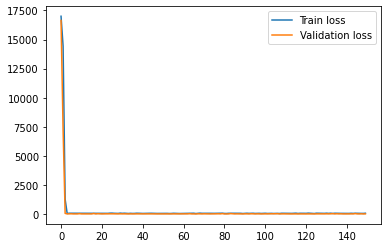

In [ ]:
dims=[50]
for dim_size in dims:
  model, X_nn, gene_labels_fin, gene_markers_fin = data_prep_train_for_NN(main_markers_var_check_TS.reset_index(), dim_size, n_epochs=150, batch_size=128)


In [ ]:
cols = training_set.columns.to_list()
cols = cols[1:-2] + cols[:1] + cols[-1:]
training_set = training_set[cols]

dims=[100]
for dim_size in dims:
  model, X_nn, gene_labels_fin, gene_markers_fin = data_prep_train_for_NN(training_set, dim_size, n_epochs=300, batch_size=64)


Shape of the dataset for the modelling: (10575, 2181)
Shape of the train set: (9517, 2181), shape of the validation set (1058, 2181)
CiteAutoencoder(
  (encoder): Encoder(
    (encoder_rna): LinBnDrop(
      (0): Linear(in_features=2181, out_features=400, bias=False)
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.1, inplace=False)
    )
    (encoder): LinBnDrop(
      (0): Linear(in_features=400, out_features=100, bias=False)
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (decoder): Decoder(
    (decoder): Sequential(
      (0): LinBnDrop(
        (0): Linear(in_features=100, out_features=400, bias=False)
        (1): LeakyReLU(negative_slope=0.01)
        (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): LinBnDrop(
        (0

  2%|▏         | 6/300 [00:08<06:38,  1.36s/it]


KeyboardInterrupt: ignored

In [ ]:
training_set = training_set.set_index('gene')
training_set = training_set[training_set.columns[:-1]]
test_ds = TabularDataset(training_set.to_numpy(dtype=np.float32))
test_dl = DataLoader(test_ds, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.eval()
with torch.no_grad():
    res = [model(x.to(device)) for x, _ in test_dl]
res = torch.cat(res, dim=0)
for x, _ in test_dl:
  print(x.shape)
test_dl


RuntimeError: ignored

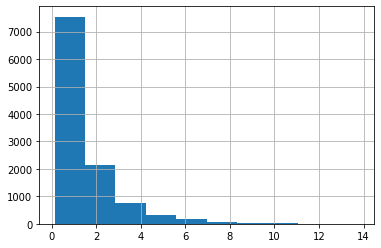

In [ ]:
a = training_set.mean(axis=1,skipna=True, numeric_only=True)
a.hist()